In [2]:
#!pip install opendatasets
#!pip install numpy
#!pip install geoplot
#!pip install geopandas
#!pip install pandas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import opendatasets as od
import seaborn as sb
import datetime
import matplotlib.patches as mpatches
import plotly.express as px

from plotly import graph_objs as go
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [4]:
od.download("https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download")
#"username":"testingqwerty","key": see assignment submission in NTULearn

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [5]:
Raw = pd.read_csv('us-accidents/US_Accidents_Dec21_updated.csv')
Raw

ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.112060  -83.031870         3.230   
1        39.865420  -84.062800  39.865010  -84.048730         0.747   
2        39.102660  -84.524680  39.102090  -84.523960         0.055   
3        41.062130  -81.537840  41.062170  -81.535470         0.123   
4        39.172393  -84.492792  39.170476  -84.501798         0.500   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                          At Dart Ave/Exit 21 - Accident.  ...       False   
4                       At Mitchell Ave/Exit 6 - Accident.  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
... 

In [6]:
Raw1 = pd.DataFrame(Raw.loc[Raw['State'] == 'CA'])
Raw1

ID  Severity           Start_Time             End_Time  \
988          A-989         3  2016-03-22 18:53:11  2016-03-23 00:53:11   
989          A-990         2  2016-03-22 19:00:49  2016-03-23 01:00:49   
990          A-991         3  2016-03-22 20:07:32  2016-03-23 02:07:32   
991          A-992         2  2016-03-22 21:40:18  2016-03-23 03:40:18   
992          A-993         2  2016-03-22 21:36:42  2016-03-23 03:36:42   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
988      38.825840 -120.029214  38.827194 -120.030632         0.121   
989      37.358209 -121.840017  37.361596 -121.842044         0.259   
990      37.881943 -122.307987  37.885882 -122.308878         0.276   
991      37.881038 -122.307788  37.883458 -122.308366         0.170   
992      38.518811 -121.101664  38.518811 -121.101664         0.000   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
988      Between Twin Bridges Tract and South Lake Taho...  ...       False   
989      Between Capitol Expy and Alum Rock Ave - Accid...  ...       False   
990               At I-80/I-580 Northern Split - Accident.  ...       False   
991               At I-80/I-580 Northern Split - Accident.  ...       False   
992      Between Latrobe Rd/Indio Dr and Latrobe Rd - A...  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
988       False  False           False          False        False   
989       False  False           False          False        False   
990       False  False           False          False        False   
991       False  False           False          False        False   
992       False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
988                Day            Day               Day                   Day  
989                Day            Day               Day                   Day  
990              Night          Night               Day                   Day  
991              Night          Night             Night                 Night  
992              Night          Night             Night                 Night  
... 

# EDA

In [7]:
# Show severity of accidents
severity_df = pd.DataFrame(Raw1['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})
fig = go.Figure(go.Funnelarea(
    text = ["Severity - 2","Severity - 3", "Severity - 4", "Severity - 1"],
    values = severity_df.Cases,
    title = {"position": "top center", 
             "text": "<b>Impact on the Traffic due to the Accidents</b>", 
             'font':dict(size=18,color="#7f7f7f")},
    marker = {"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'],
                "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
    ))

fig.show()

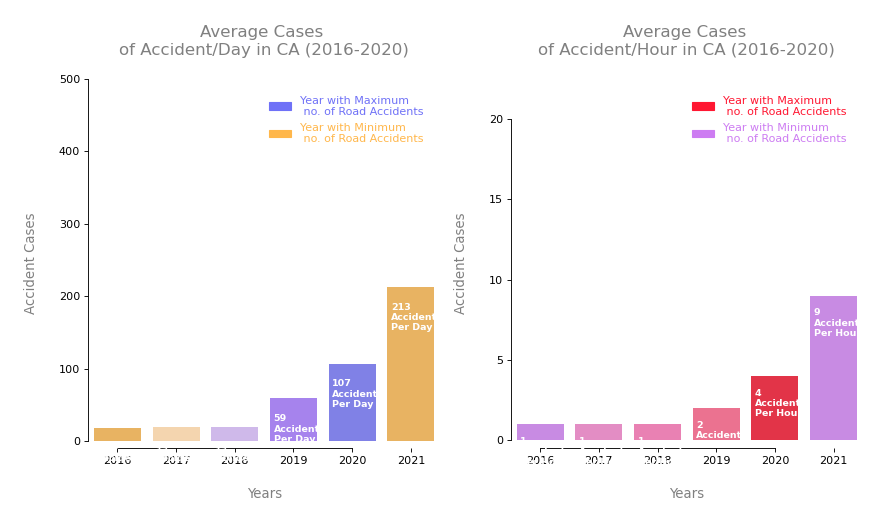

In [11]:
# For California
Raw1.Start_Time = pd.to_datetime(Raw1.Start_Time)
Raw1.End_Time = pd.to_datetime(Raw1.End_Time)
year_df = pd.DataFrame(Raw1.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
year_df['accident/day'] = round(year_df['Cases']/(5*365))
year_df['accident/hour'] = round(year_df['Cases']/(5*365*24))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12.5,6), dpi = 80)
count = 0
plots = ['accident/day', 'accident/hour']
plots_limit = [(-10, 500), (-0.5, 22.5)]
plots_bound = [(0, 500), (0, 20)]
plot_text = [60, 2.5]
colors = [['#ffb74b', '#ffd6a4', '#ceb1f2', '#a071ff', '#6f71f7'], 
          ['#cd7cf2', '#f27ec8', '#fa70b3', '#ff5e86', '#ff1732']]
for i in [ax1, ax2]:
    sb.barplot(ax=i, y=year_df[plots[count]], x=year_df['Year'], palette=colors[count])
    var = plots[count].split('/')[-1].capitalize()
    for j in i.patches:
        i.text(j.get_x()+0.06, j.get_height()-plot_text[count], \
                str(int(j.get_height()))+'\nAccidents\nPer {}'.format(var), fontsize=8.5, color='white', weight='bold')
    i.axes.set_ylim(plots_limit[count])
    i.axes.set_ylabel('\nAccident Cases\n', fontsize=12, color='grey')
    i.axes.set_xlabel('\nYears\n', fontsize=12, color='grey')
    i.tick_params(axis='both', which='major', labelsize=10)
    i.set_title('\nAverage Cases \nof Accident/{} in CA (2016-2020)\n'.format(var), fontsize =15, color='grey')
    i.spines['bottom'].set_bounds(0.005, 4)
    i.spines['left'].set_bounds(plots_bound[count])
    for k in ['top', 'right']:
            side = i.spines[k]
            side.set_visible(False)
    i.set_axisbelow(True)
    MA = mpatches.Patch(color=colors[count][-1], label='Year with Maximum\n no. of Road Accidents')
    MI = mpatches.Patch(color=colors[count][0], label='Year with Minimum\n no. of Road Accidents')
    i.legend(handles=[MA, MI], prop={'size': 10}, loc='best', borderpad=1, 
          labelcolor=[colors[count][-1], colors[count][0]], edgecolor='white');
    count += 1

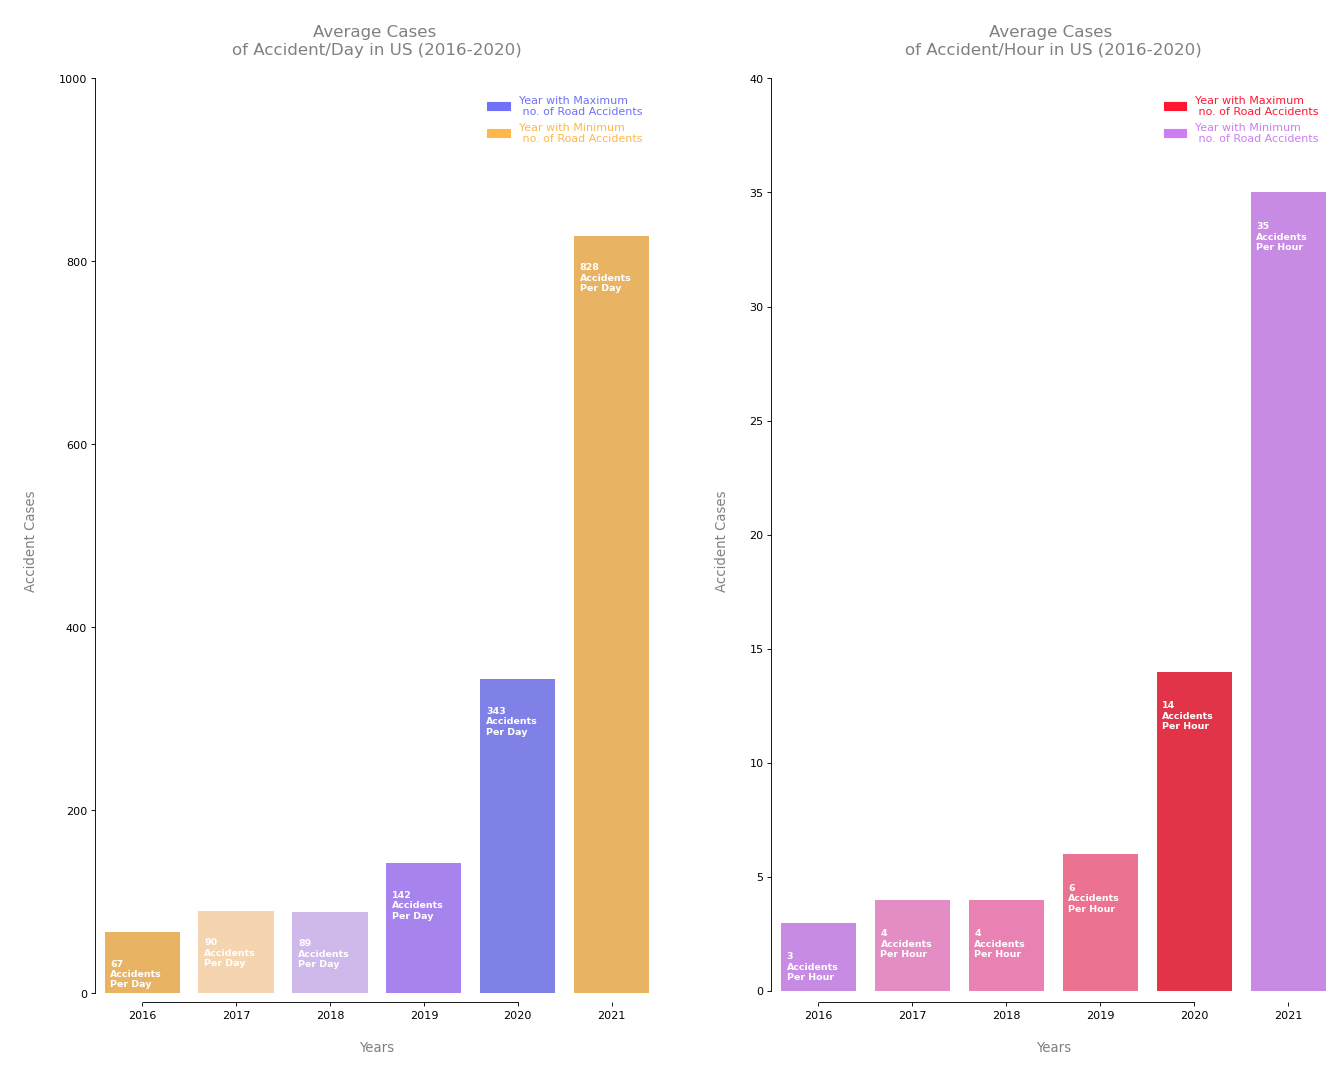

In [12]:
# For whole of US
Raw.Start_Time = pd.to_datetime(Raw.Start_Time)
Raw.End_Time = pd.to_datetime(Raw.End_Time)
year_df = pd.DataFrame(Raw.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
year_df['accident/day'] = round(year_df['Cases']/(5*365))
year_df['accident/hour'] = round(year_df['Cases']/(5*365*24))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,15), dpi = 80)
count = 0
plots = ['accident/day', 'accident/hour']
plots_limit = [(-10, 1000), (-0.5, 40)]
plots_bound = [(0, 1000), (0, 40)]
plot_text = [60, 2.5]
colors = [['#ffb74b', '#ffd6a4', '#ceb1f2', '#a071ff', '#6f71f7'], 
          ['#cd7cf2', '#f27ec8', '#fa70b3', '#ff5e86', '#ff1732']]
for i in [ax1, ax2]:
    sb.barplot(ax=i, y=year_df[plots[count]], x=year_df['Year'], palette=colors[count])
    var = plots[count].split('/')[-1].capitalize()
    for j in i.patches:
        i.text(j.get_x()+0.06, j.get_height()-plot_text[count], \
                str(int(j.get_height()))+'\nAccidents\nPer {}'.format(var), fontsize=8.5, color='white', weight='bold')
    i.axes.set_ylim(plots_limit[count])
    i.axes.set_ylabel('\nAccident Cases\n', fontsize=12, color='grey')
    i.axes.set_xlabel('\nYears\n', fontsize=12, color='grey')
    i.tick_params(axis='both', which='major', labelsize=10)
    i.set_title('\nAverage Cases \nof Accident/{} in US (2016-2020)\n'.format(var), fontsize =15, color='grey')
    i.spines['bottom'].set_bounds(0.005, 4)
    i.spines['left'].set_bounds(plots_bound[count])
    for k in ['top', 'right']:
            side = i.spines[k]
            side.set_visible(False)
    i.set_axisbelow(True)
    MA = mpatches.Patch(color=colors[count][-1], label='Year with Maximum\n no. of Road Accidents')
    MI = mpatches.Patch(color=colors[count][0], label='Year with Minimum\n no. of Road Accidents')
    i.legend(handles=[MA, MI], prop={'size': 10}, loc='best', borderpad=1, 
          labelcolor=[colors[count][-1], colors[count][0]], edgecolor='white');
    count += 1

In [20]:
Raw1['datetime_start_parsed'] = pd.to_datetime(Raw1['Start_Time'], format="%Y-%m-%d %H:%M:%S")
Raw1['datetime_end_parsed'] = pd.to_datetime(Raw1['End_Time'], format="%Y-%m-%d %H:%M:%S")
Raw1['datetime_weathertime_parsed'] = pd.to_datetime(Raw1['Weather_Timestamp'], format="%Y-%m-%d %H:%M:%S")

In [45]:
#categorized variables based on numerical, categoric, and datetime
#description is excluded
numerical = [
       'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)','Number','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'
]
categorical = [
    'Severity','Street', 'Side', 'City', 'Zipcode', 'County', 'State','Country','Timezone','Airport_Code','Wind_Direction','Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'
]
Datetime = [
        'datetime_start_parsed','datetime_end_parsed','datetime_weathertime_parsed'
]

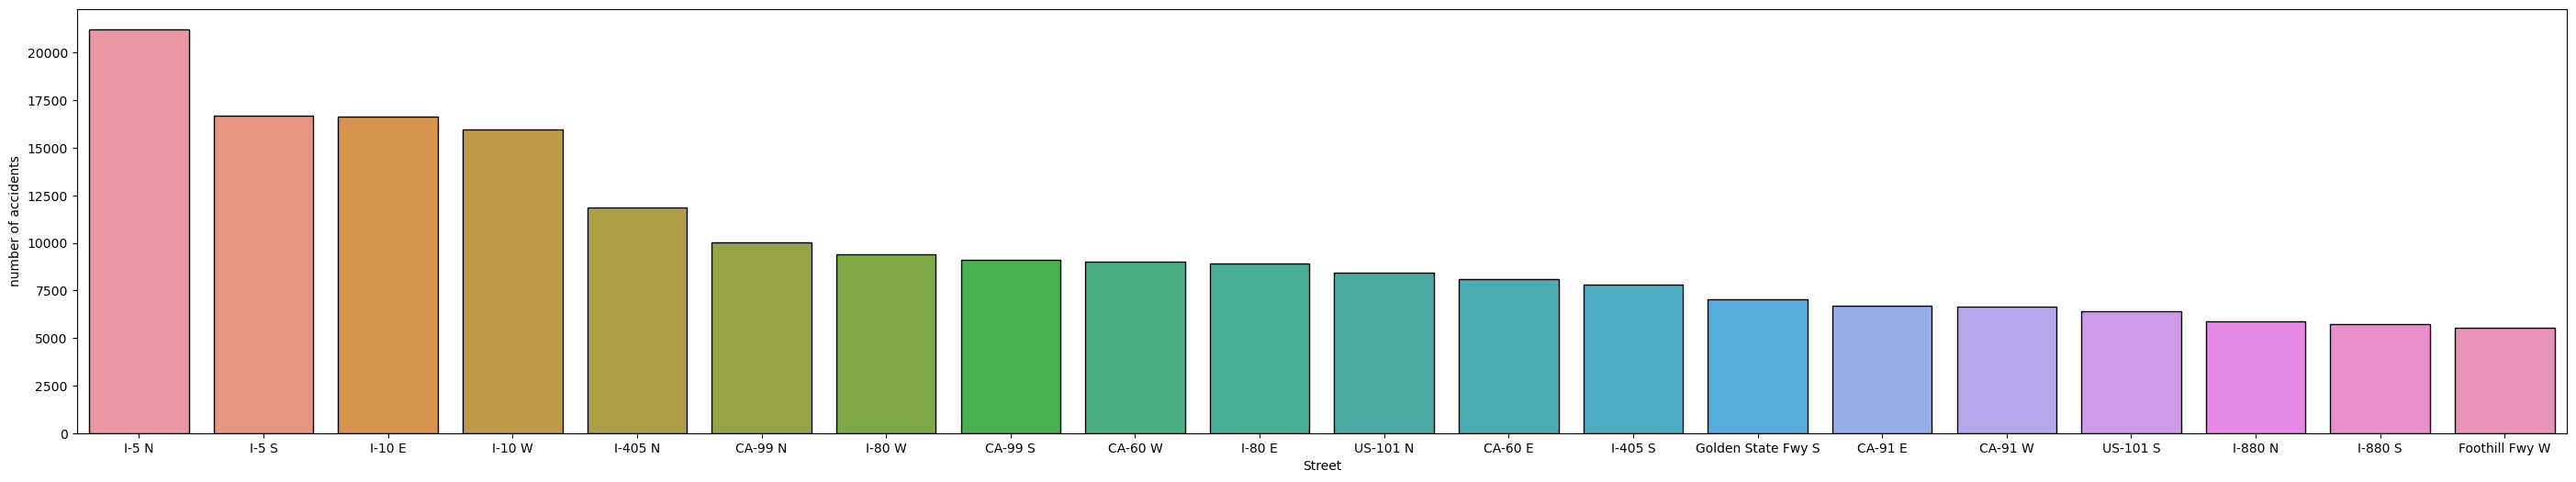

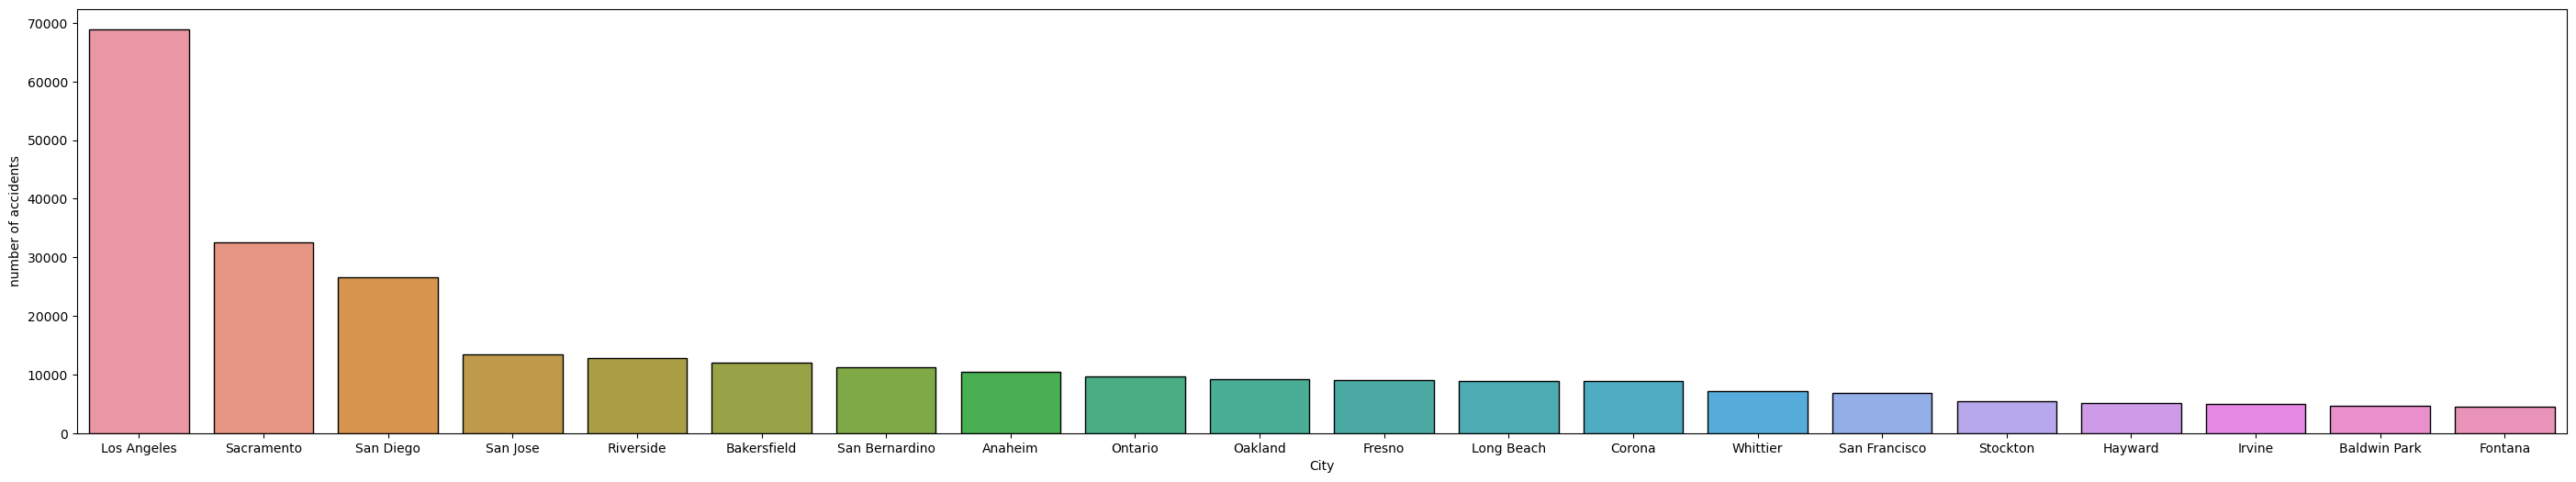

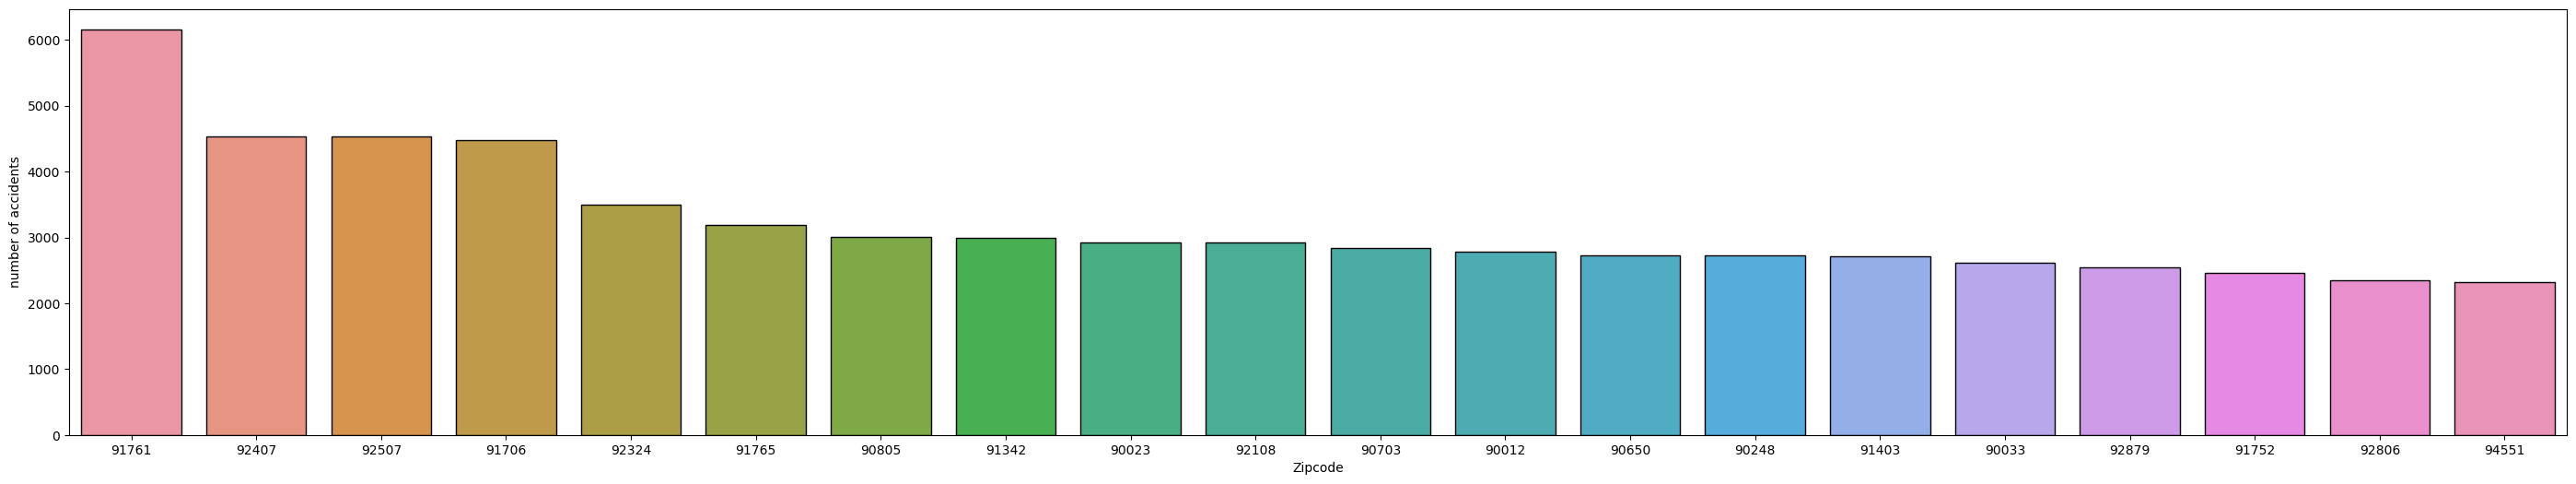

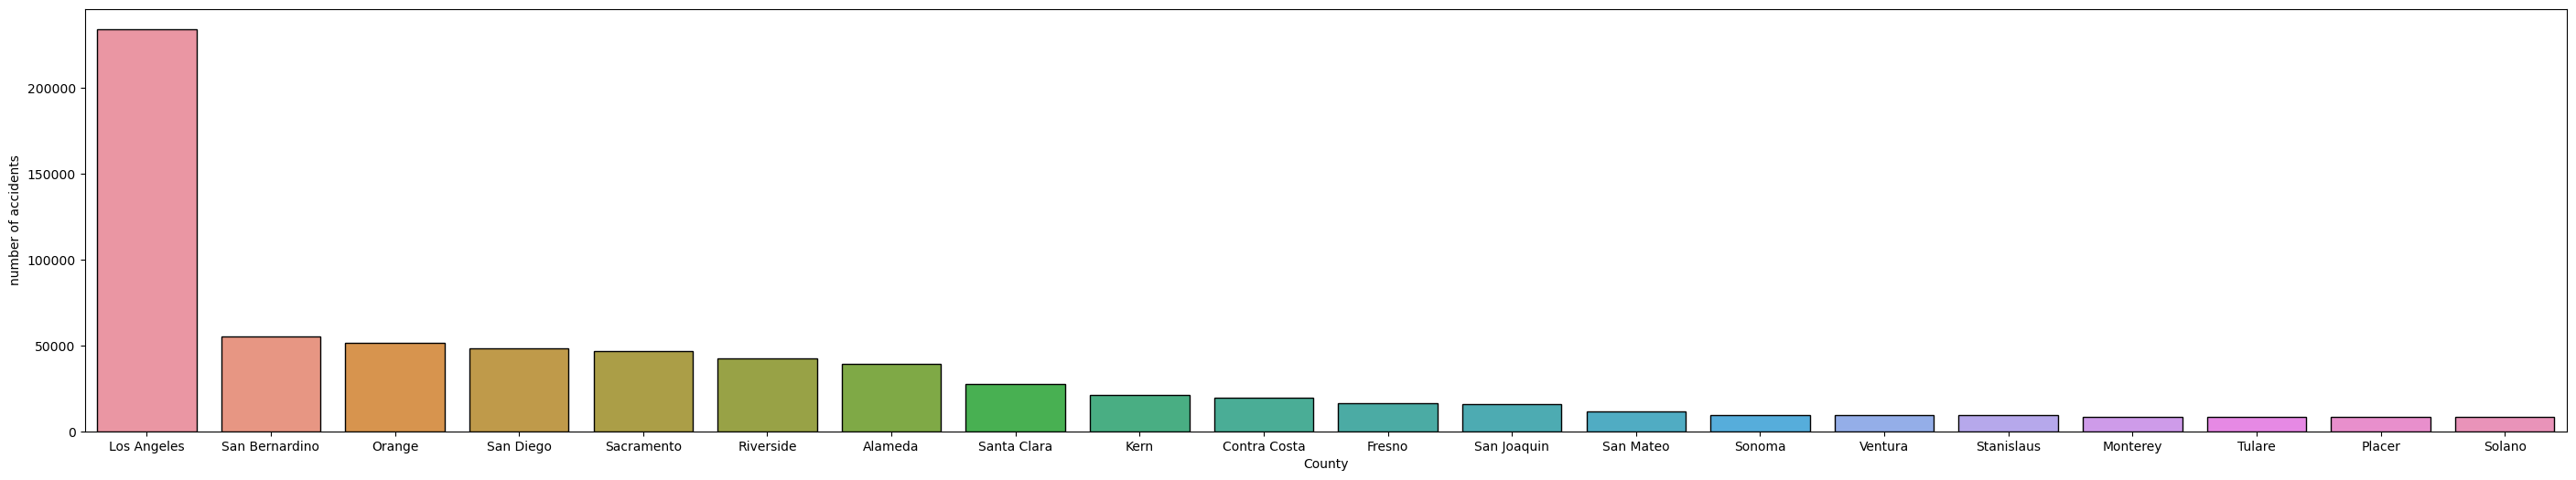

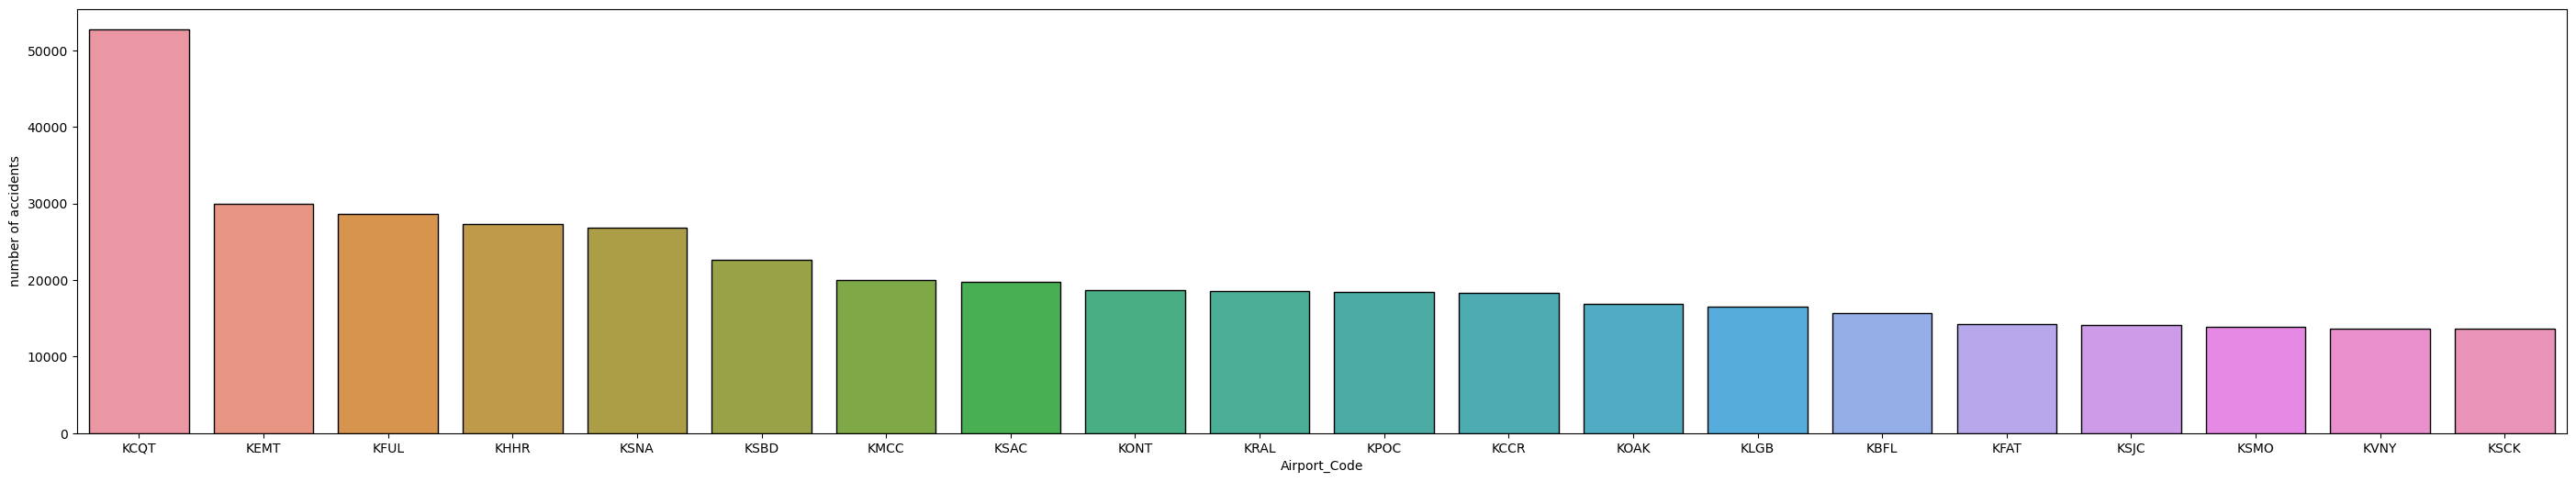

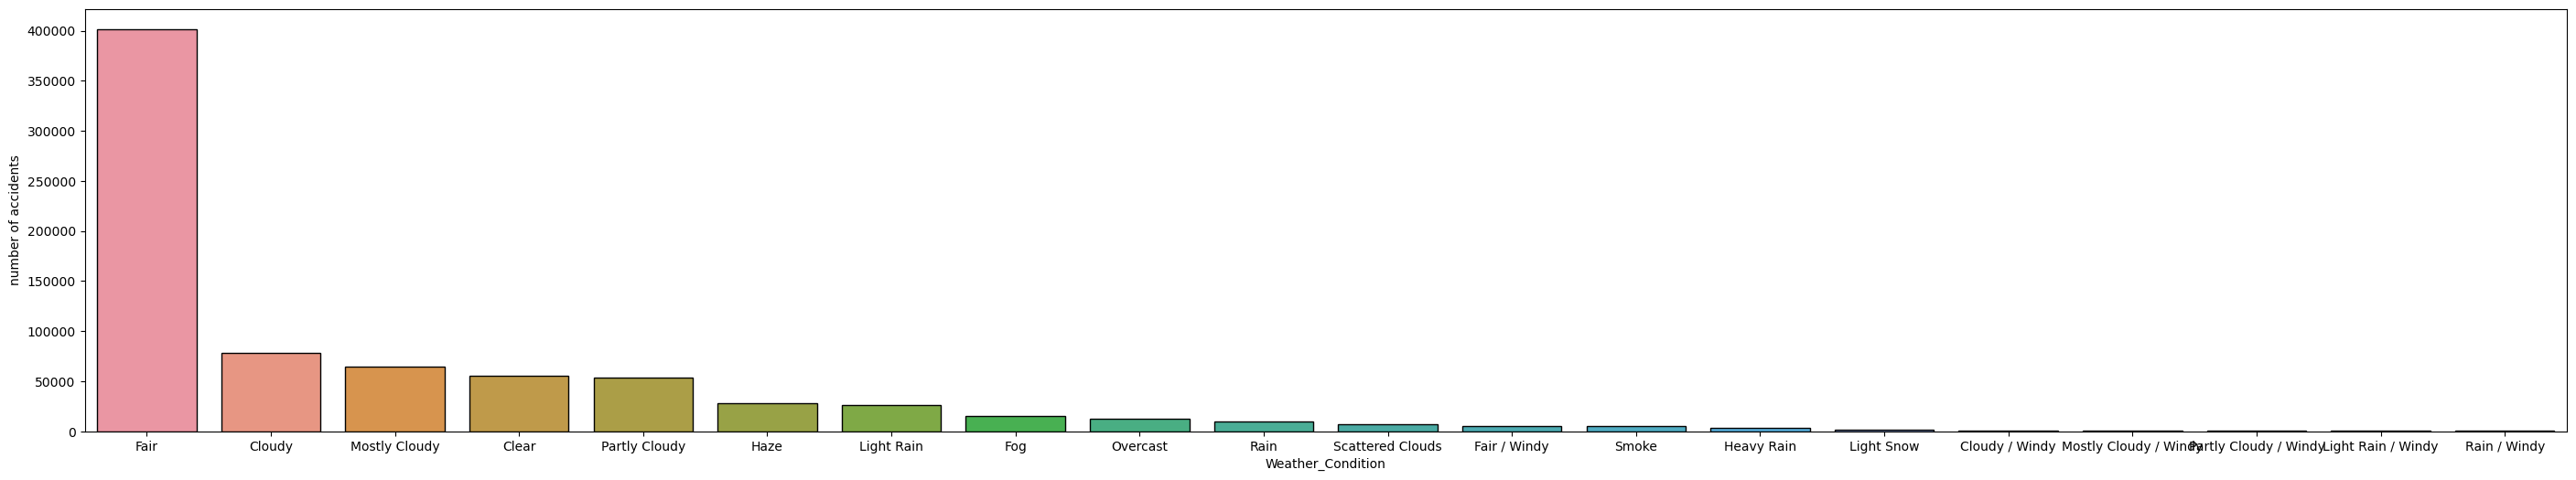

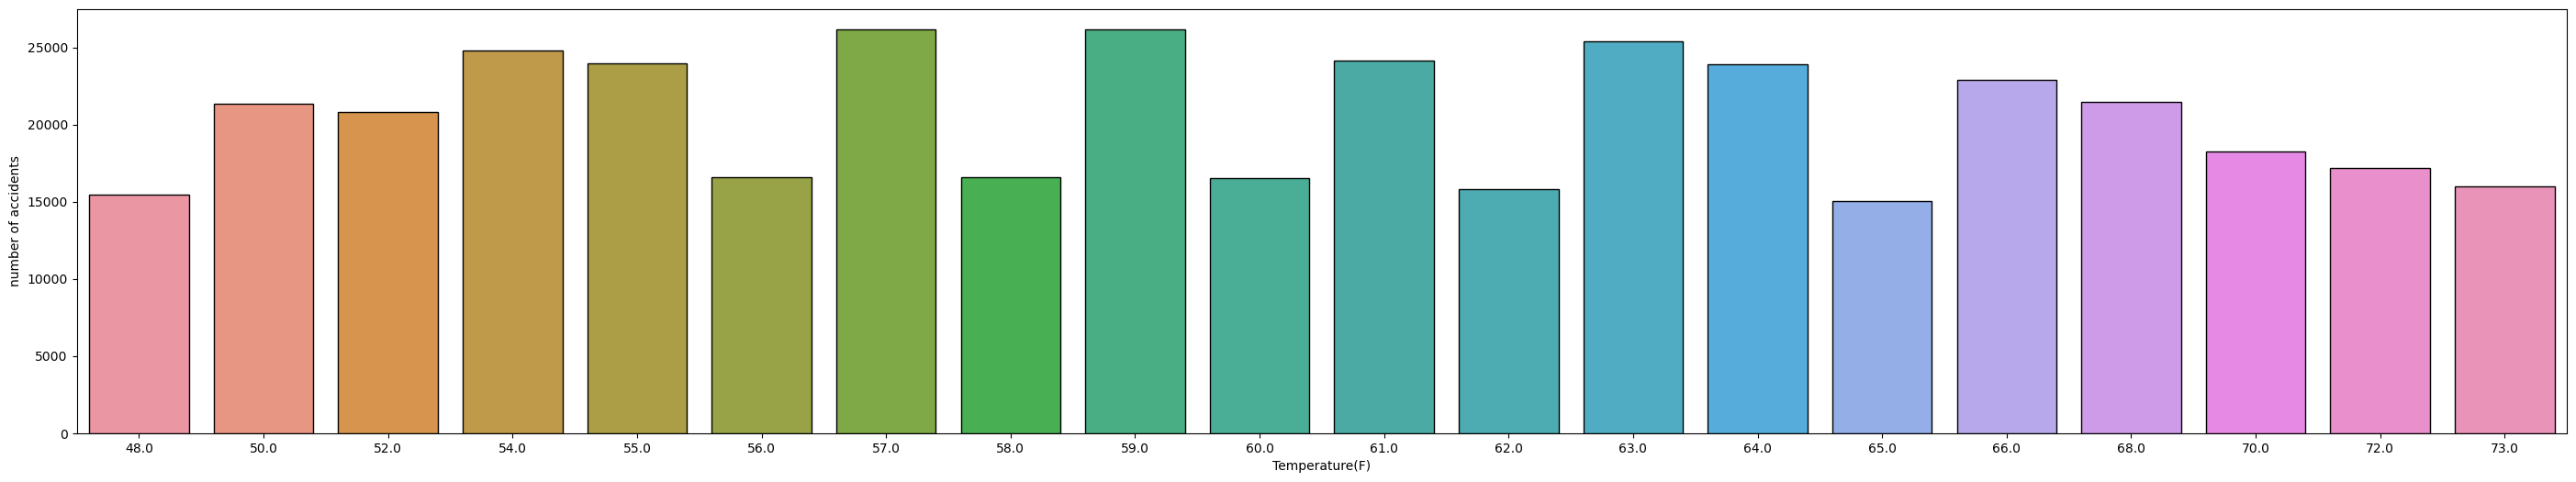

In [22]:
# Plotting 7 categorical plots
cat_7 = ['Street','City', 'Zipcode', 'County', 'Airport_Code', 'Weather_Condition','Temperature(F)']
for i in cat_7:
    cat_grouped = Raw1.groupby(i)['ID'].nunique().nlargest(20)
    plt.figure(figsize=(35, 6))
    sb.barplot(edgecolor='black',x=cat_grouped.index,y=cat_grouped)
    plt.xlabel(i)
    plt.ylabel('number of accidents')
    plt.show()

In [24]:
Raw1["dayofweek"]=pd.DatetimeIndex(Raw1["Start_Time"]).dayofweek
Raw1["month"]=pd.DatetimeIndex(Raw1["Start_Time"]).month
Raw1["year"]=pd.DatetimeIndex(Raw1["Start_Time"]).year

In [26]:
Raw1["month"]=Raw1["month"].map({1:"january",
                2:"feburary",
                3:"march",
                4:"april",
                5:"may",
                6:"june",
                7:"july",
                8:"august",
                9:"september",
                10:"october",
                11:"november",
                12:"december"})
Raw1["dayofweek"]=Raw1["dayofweek"].map({0:"sunday",
                                         1:"monday",
                                         2:"tuesday",
                                        3:"wednesday",
                                        4:"thursday",
                                        5:"friday",
                                        6:"saturday"})

In [27]:
monthly_accidents=Raw1["month"].value_counts().reset_index()
monthly_accidents.columns=["month","accidents"]
monthly_accidents=Raw1[["month","year"]].value_counts().reset_index()
monthly_accidents.columns=["month","year","number_of_accidents"]
monthly_accidents.head()

month  year  number_of_accidents
0   december  2021                70519
1   november  2021                43516
2    october  2021                37081
3  september  2021                33698
4    january  2021                31274

In [28]:
weekly_accidents=Raw1[["dayofweek","month","year"]].value_counts().reset_index()
weekly_accidents.columns=["day_of_the_week","month","year","number_of_accidents"]
weekly_accidents.head()

day_of_the_week     month  year  number_of_accidents
0       wednesday  december  2021                14220
1        thursday  december  2021                12335
2         tuesday  december  2021                11306
3          monday  december  2021                 9554
4          sunday  december  2021                 8625

In [29]:
weekly_accidents2=Raw1[["dayofweek","year"]].value_counts().reset_index()
weekly_accidents2.columns=["day_of_the_week","year","number_of_accidents"]
weekly_accidents2.head()

day_of_the_week  year  number_of_accidents
0        thursday  2021                68501
1       wednesday  2021                58193
2         tuesday  2021                57244
3          monday  2021                54518
4          sunday  2021                53790

<AxesSubplot:xlabel='day_of_the_week', ylabel='number_of_accidents'>

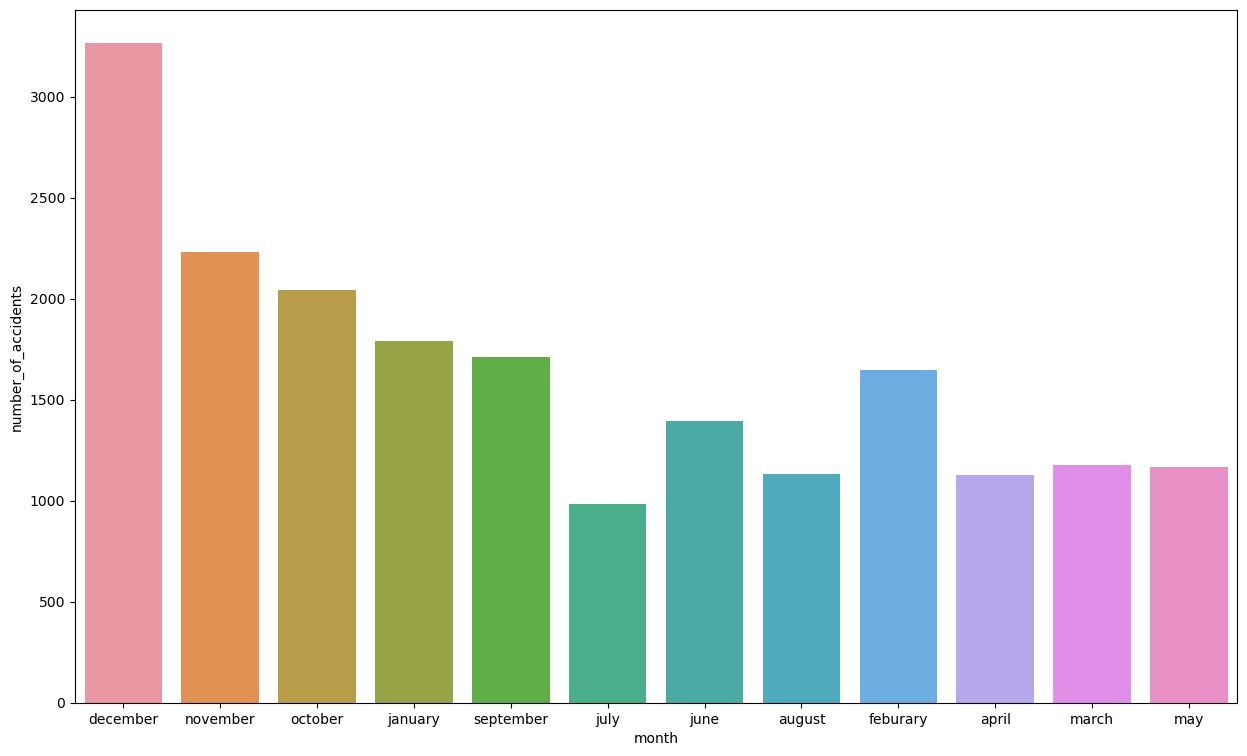

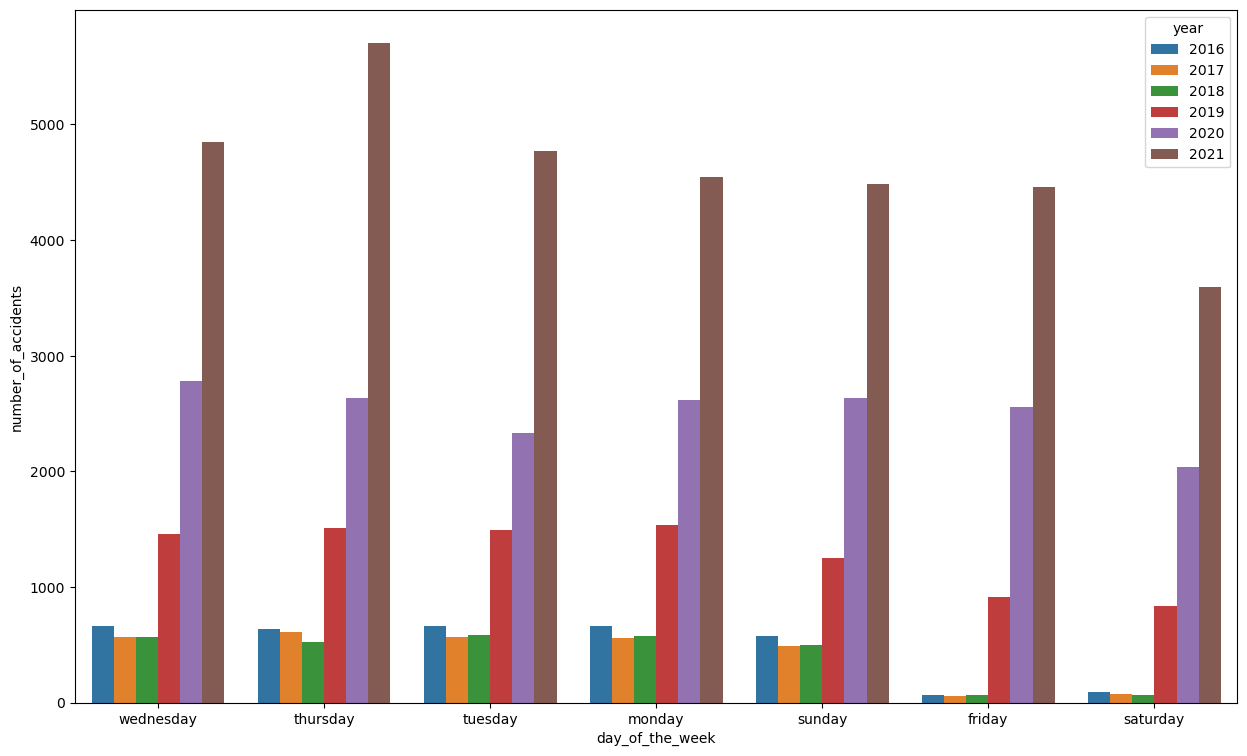

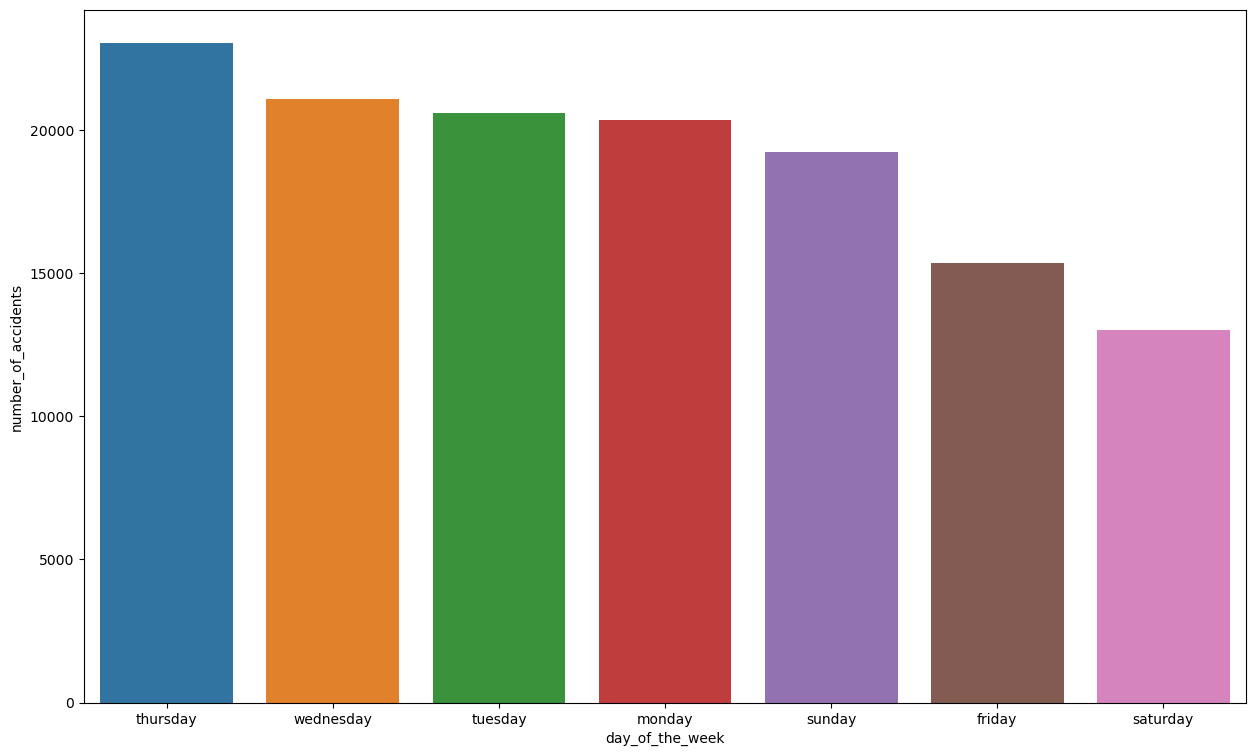

In [34]:
plt.figure(figsize=(15,9))
sb.barplot(x="month",y="number_of_accidents",data=weekly_accidents,ci = None)
plt.figure(figsize=(15,9))
sb.barplot(x="day_of_the_week",y="number_of_accidents",hue="year",data=weekly_accidents,ci = None)
plt.figure(figsize=(15,9))
##order=weekly_accidents2.sort_values('number_of_accidents').day_of_the_week
sb.barplot(x="day_of_the_week",y="number_of_accidents",data=weekly_accidents2,ci = None)

In [35]:
df = Raw1
range_temp = pd.cut(df['Temperature(F)'], 5)
range_temp.unique()
df["Temperature(F)"].value_counts()
df.loc[ (df['Temperature(F)'] <= 10), 'Temperature(F)']=1
df.loc[ (df['Temperature(F)'] > 10) & (df['Temperature(F)'] <= 50), 'Temperature(F)']=2
df.loc[ (df['Temperature(F)'] > 50) & (df['Temperature(F)'] <= 90), 'Temperature(F)']=3
df.loc[ (df['Temperature(F)'] > 90) & (df['Temperature(F)'] <= 130),'Temperature(F)' ]=4
df.loc[  df['Temperature(F)'] > 130, 'Temperature(F)']=5
weather_dist = df['Temperature(F)'].value_counts().reset_index()
weather_dist.columns=["range_temp","number_of_accidents"]
weather_dist

range_temp  number_of_accidents
0         3.0               614279
1         2.0               127410
2         4.0                31519
3         1.0                  126

In [36]:
weather_dist.range_temp=weather_dist.range_temp.map({1.0:"below 10 degree F",
                            2.0:"from 10 to 50 degree F",
                            3.0:"from 50 to 90 degree F",
                            4.0:"from 90 to 130 degree F",
                             5.0:"above 130 degree F"})
weather_dist

range_temp  number_of_accidents
0   from 50 to 90 degree F               614279
1   from 10 to 50 degree F               127410
2  from 90 to 130 degree F                31519
3        below 10 degree F                  126

In [38]:
px.bar(x=weather_dist["range_temp"],y=weather_dist["number_of_accidents"])

In [39]:
# California
Raw1["Severity"].value_counts()

2    761462
3     20213
4      9135
1      5058
Name: Severity, dtype: int64

In [40]:
# USA
Raw["Severity"].value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

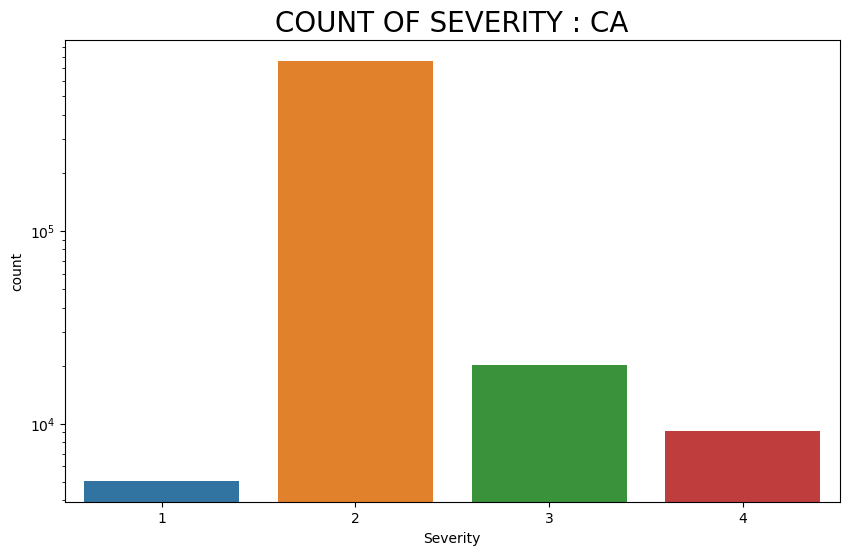

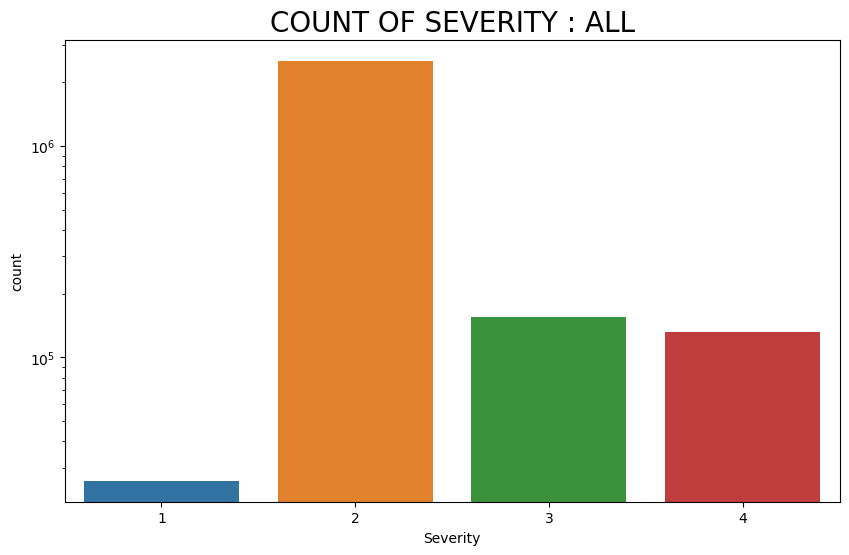

In [42]:
plt.figure(figsize=(10,6))
sb.countplot(x="Severity",data=Raw1)
plt.yscale("log")
plt.title("COUNT OF SEVERITY : CA",fontsize=20)
plt.show()
plt.figure(figsize=(10,6))
sb.countplot(x="Severity",data=Raw)
plt.yscale("log")
plt.title("COUNT OF SEVERITY : ALL",fontsize=20)
plt.show()

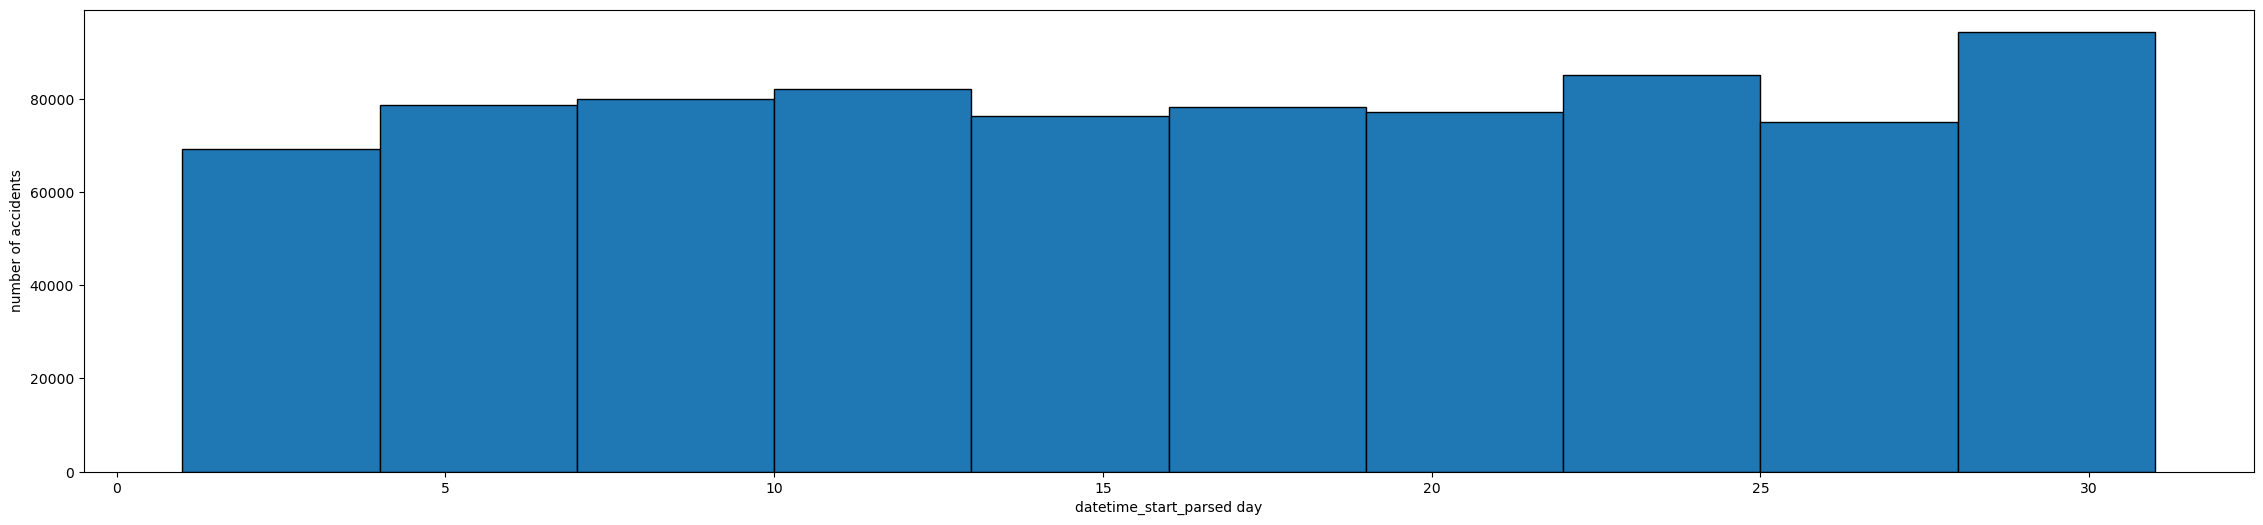

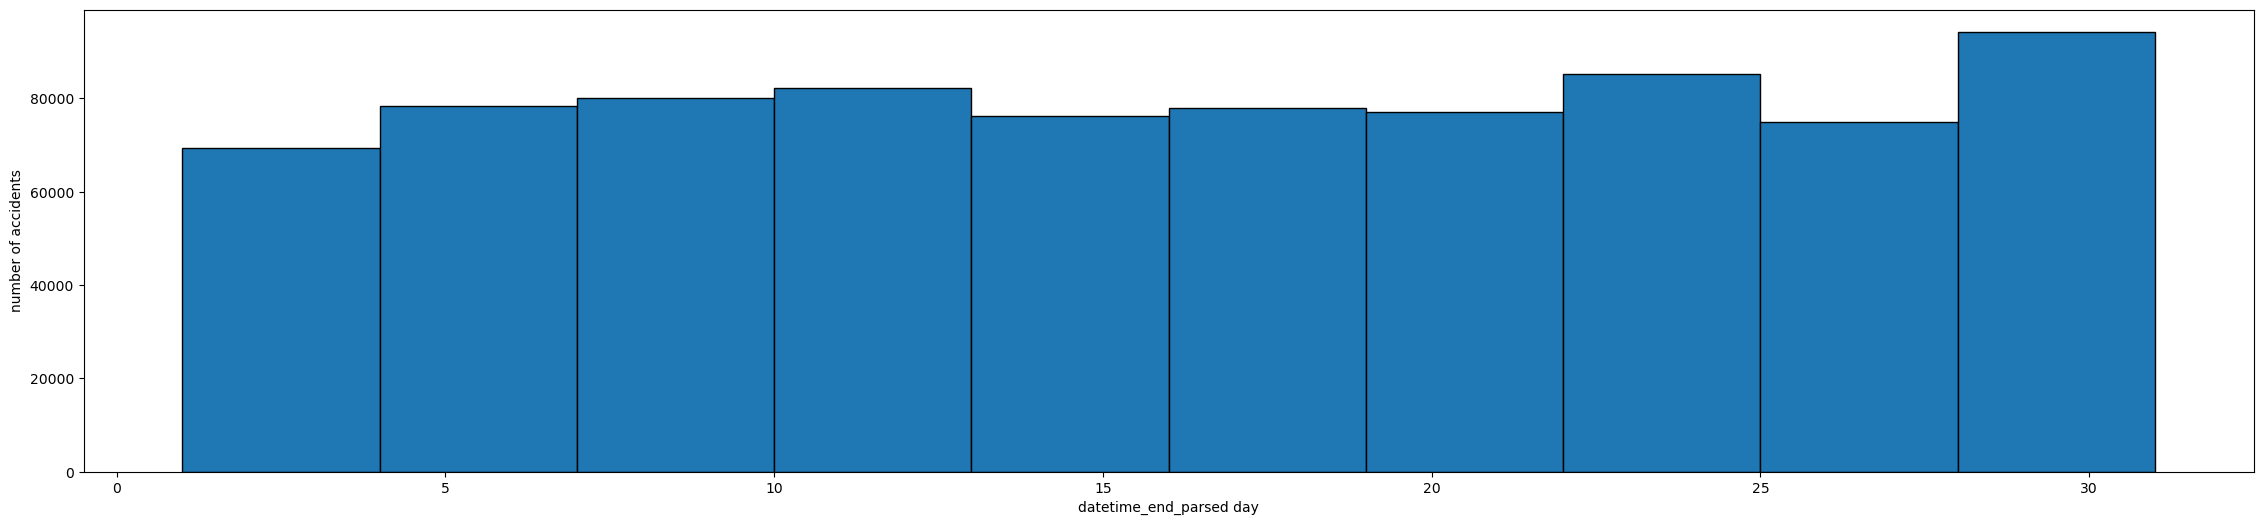

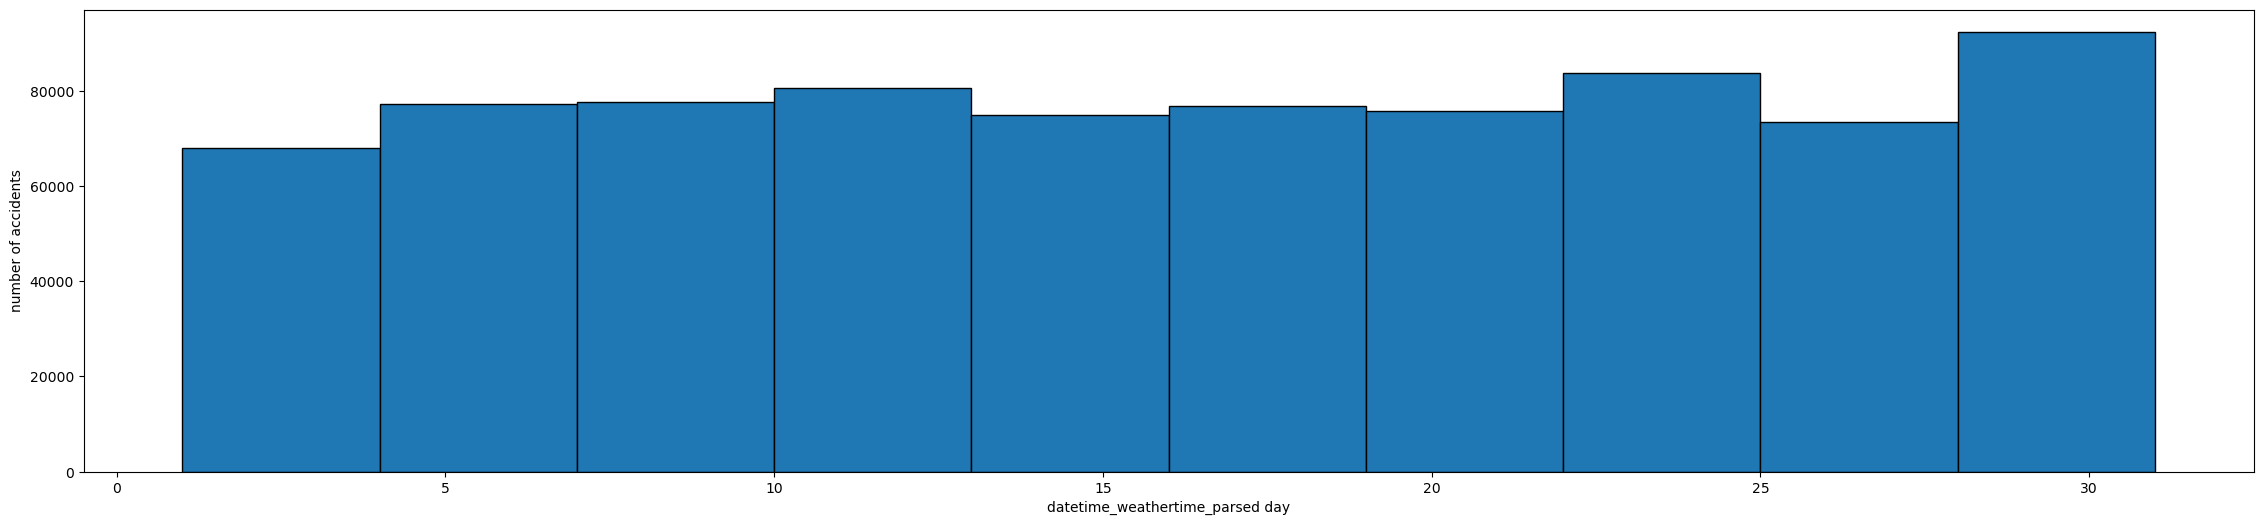

In [46]:
#histograms for day datetime data
for i in Raw1[Datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(Raw1[Datetime][i].dt.day, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} day'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

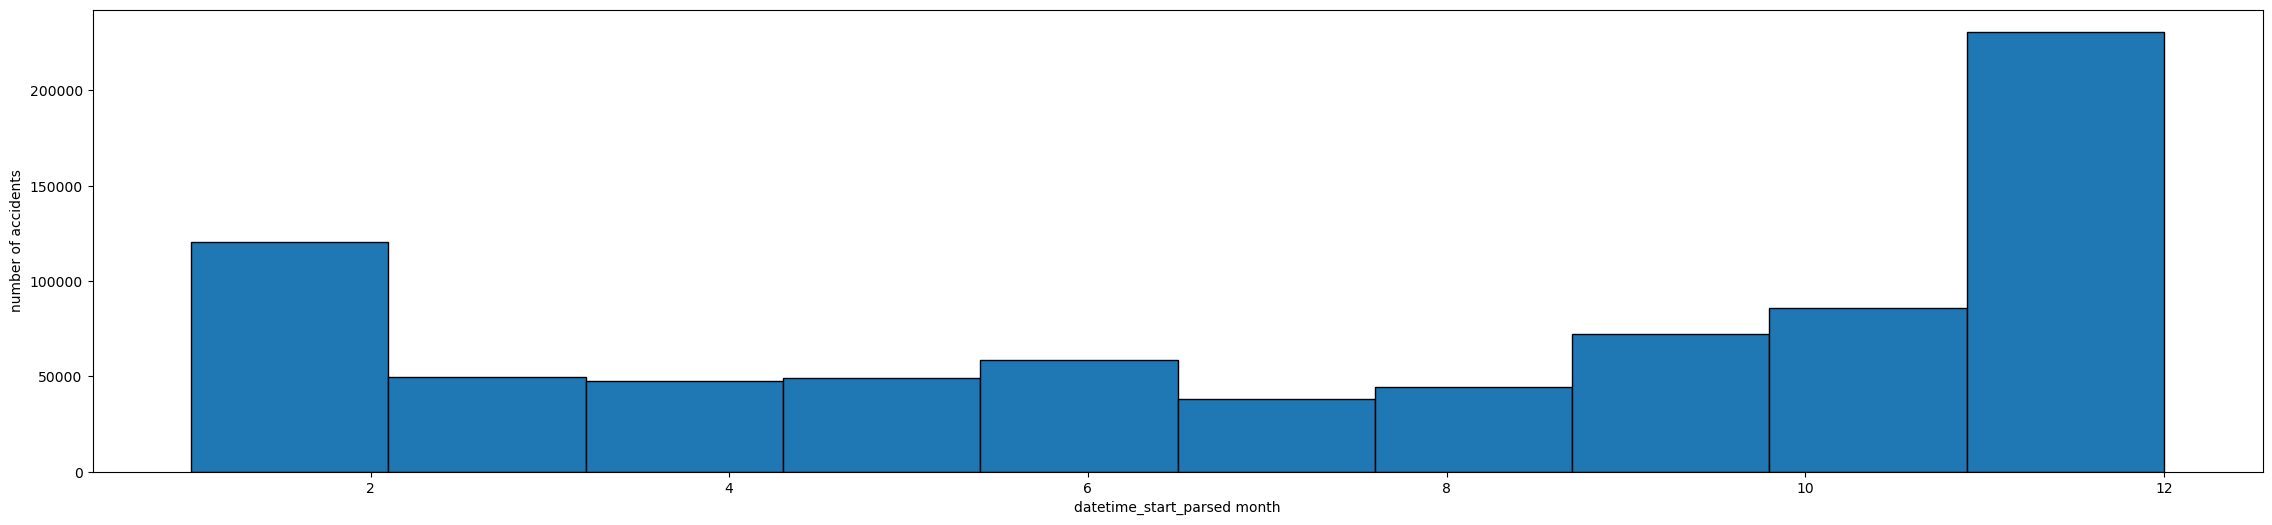

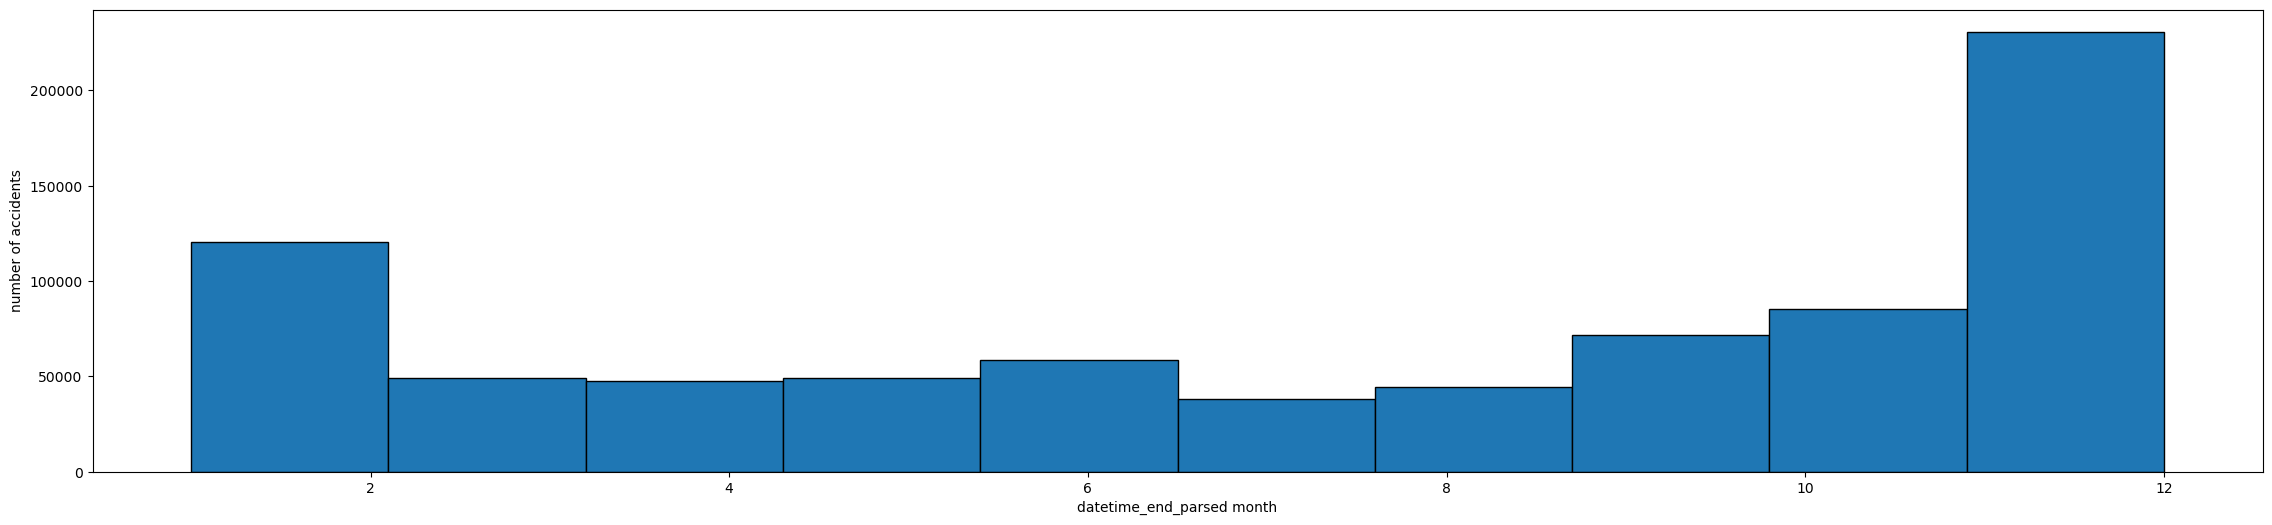

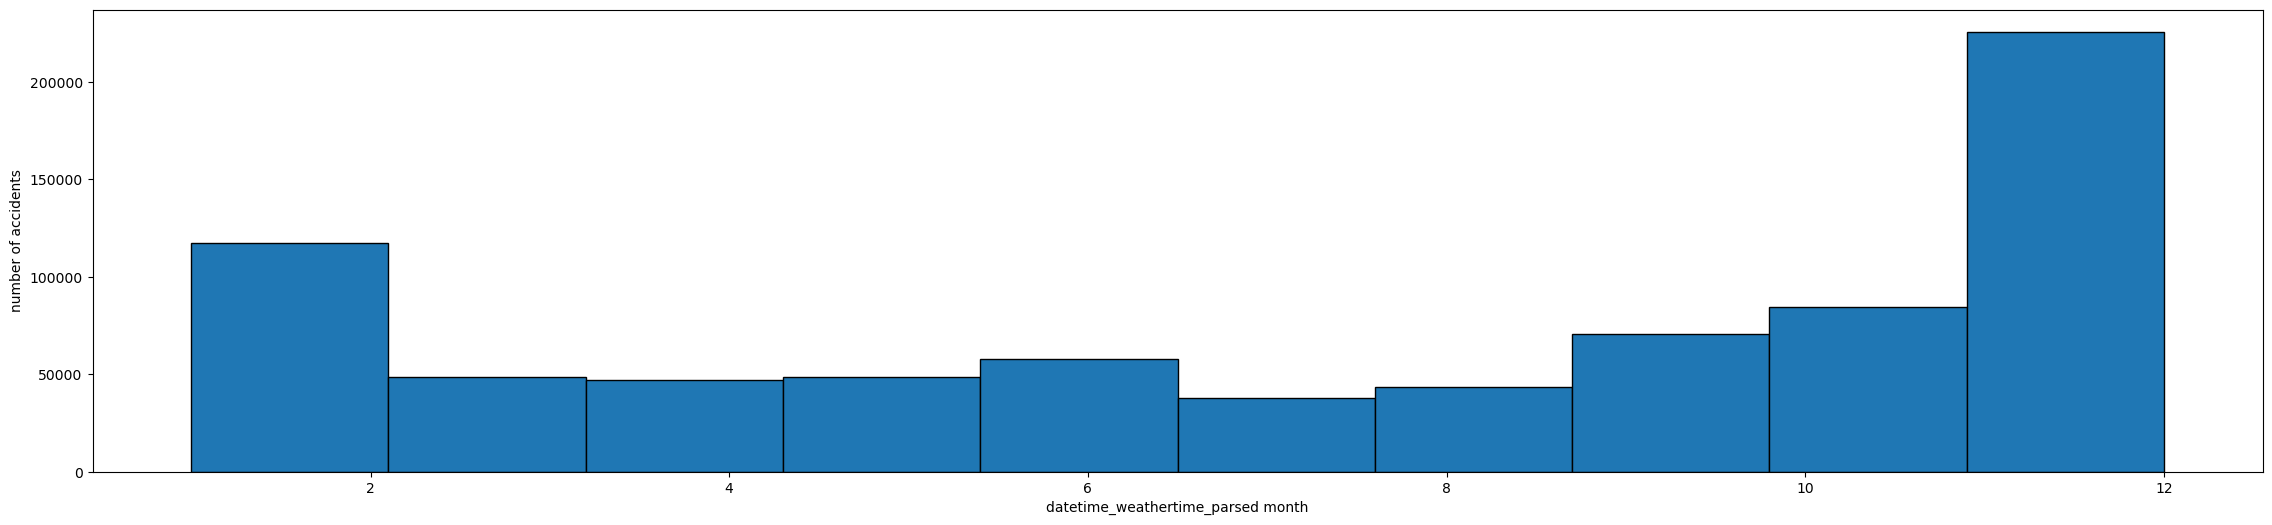

In [47]:
#histograms for month datetime data
for i in Raw1[Datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(Raw1[Datetime][i].dt.month, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} month'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

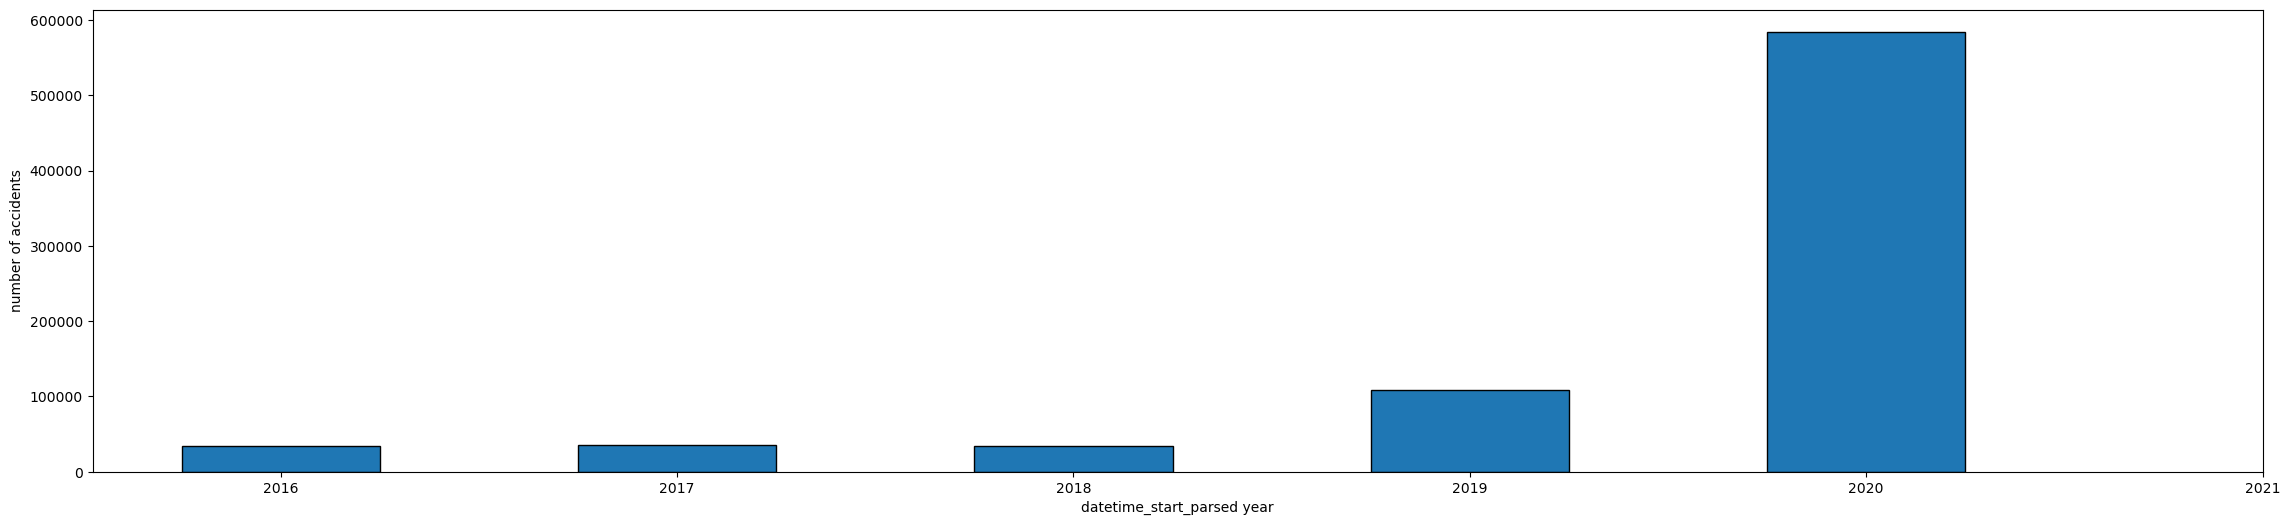

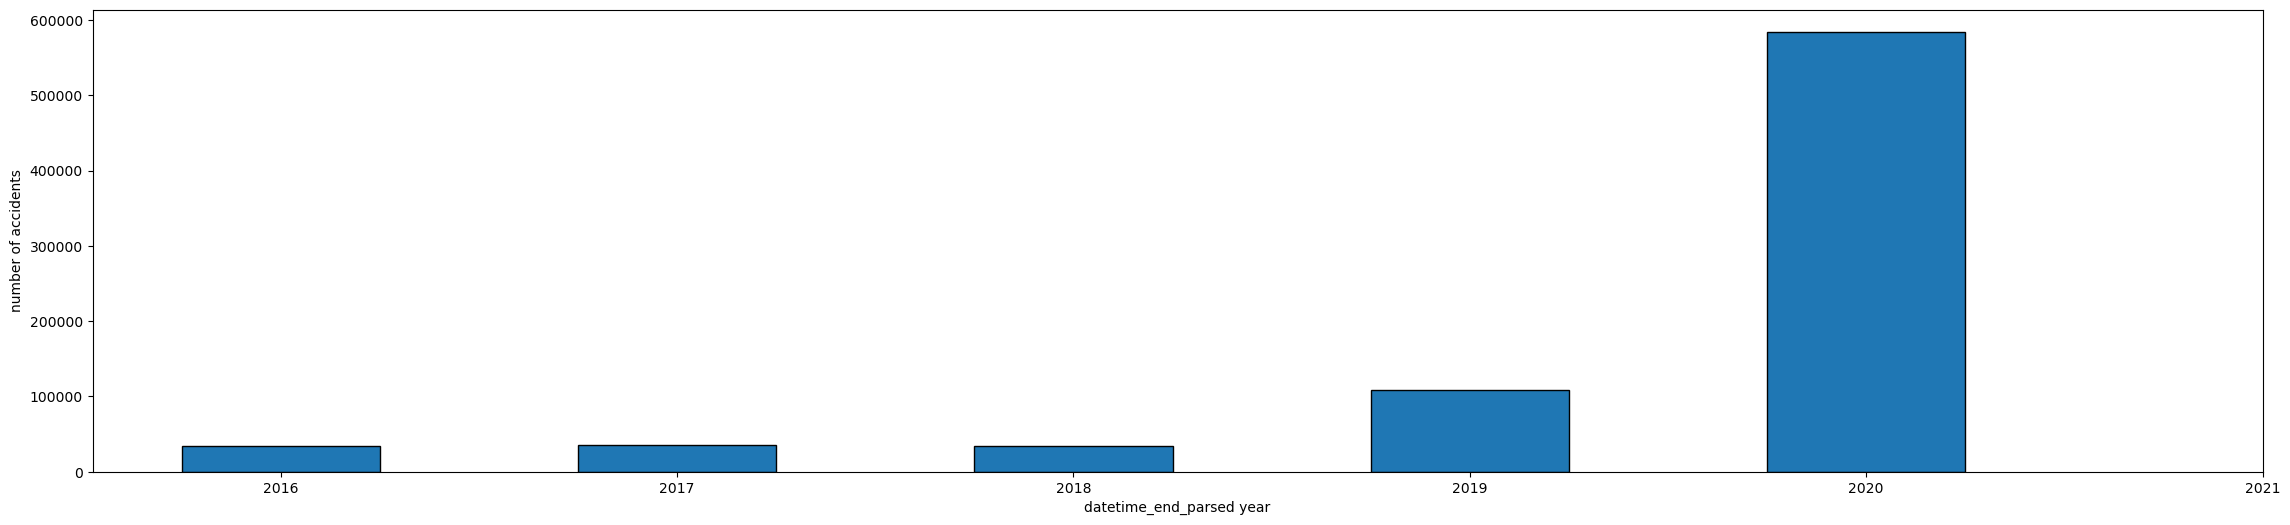

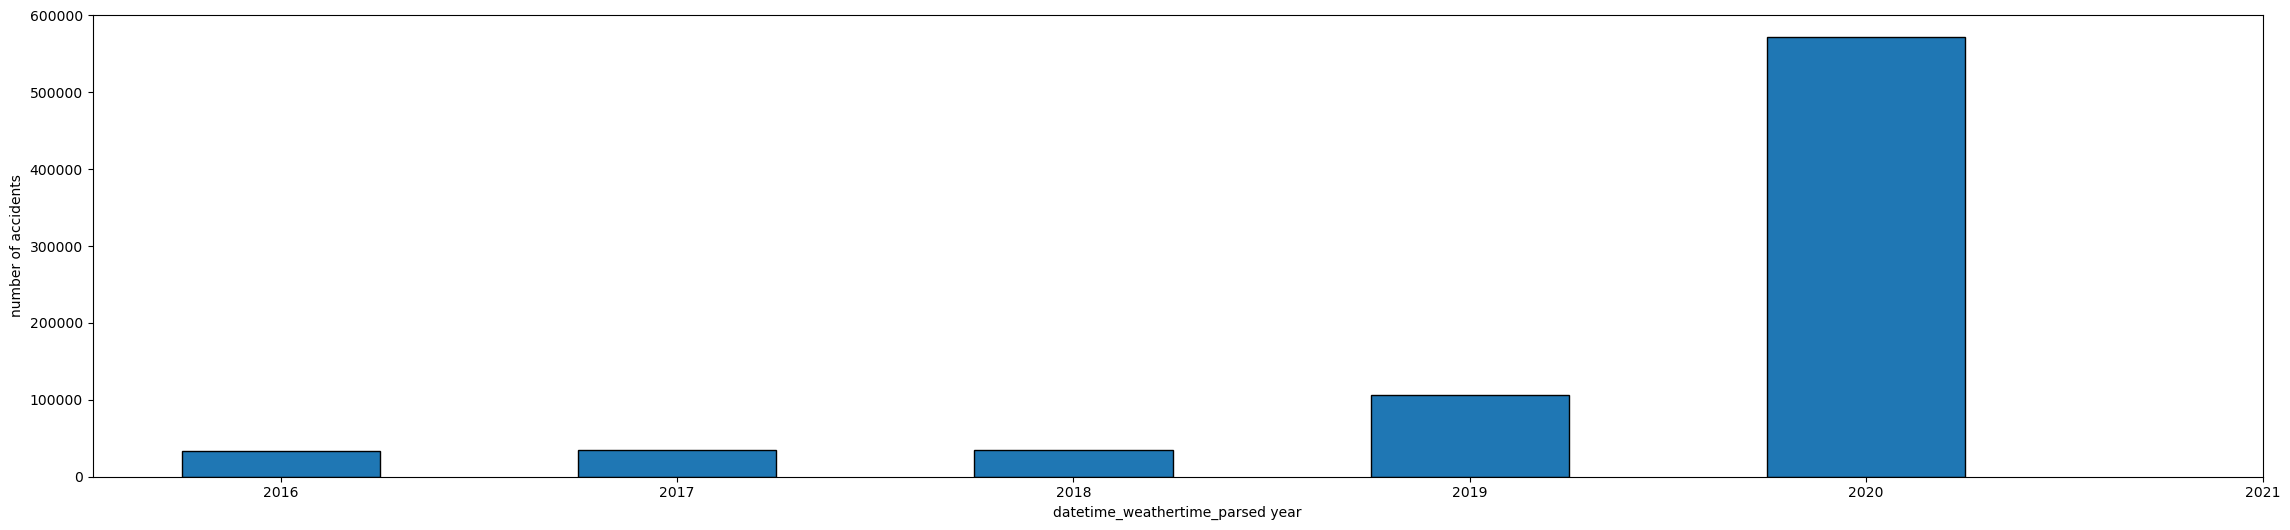

In [48]:
#histograms for year datetime data
for i in Raw1[Datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(Raw1[Datetime][i].dt.year, edgecolor='black', align='left', rwidth=0.5, bins=[2016, 2017,2018,2019,2020, 2021])
    plt.xlabel('{} year'.format(i))
    plt.xticks(ticks=[2016, 2017,2018,2019,2020, 2021])
    plt.ylabel('number of accidents')
    plt.show()

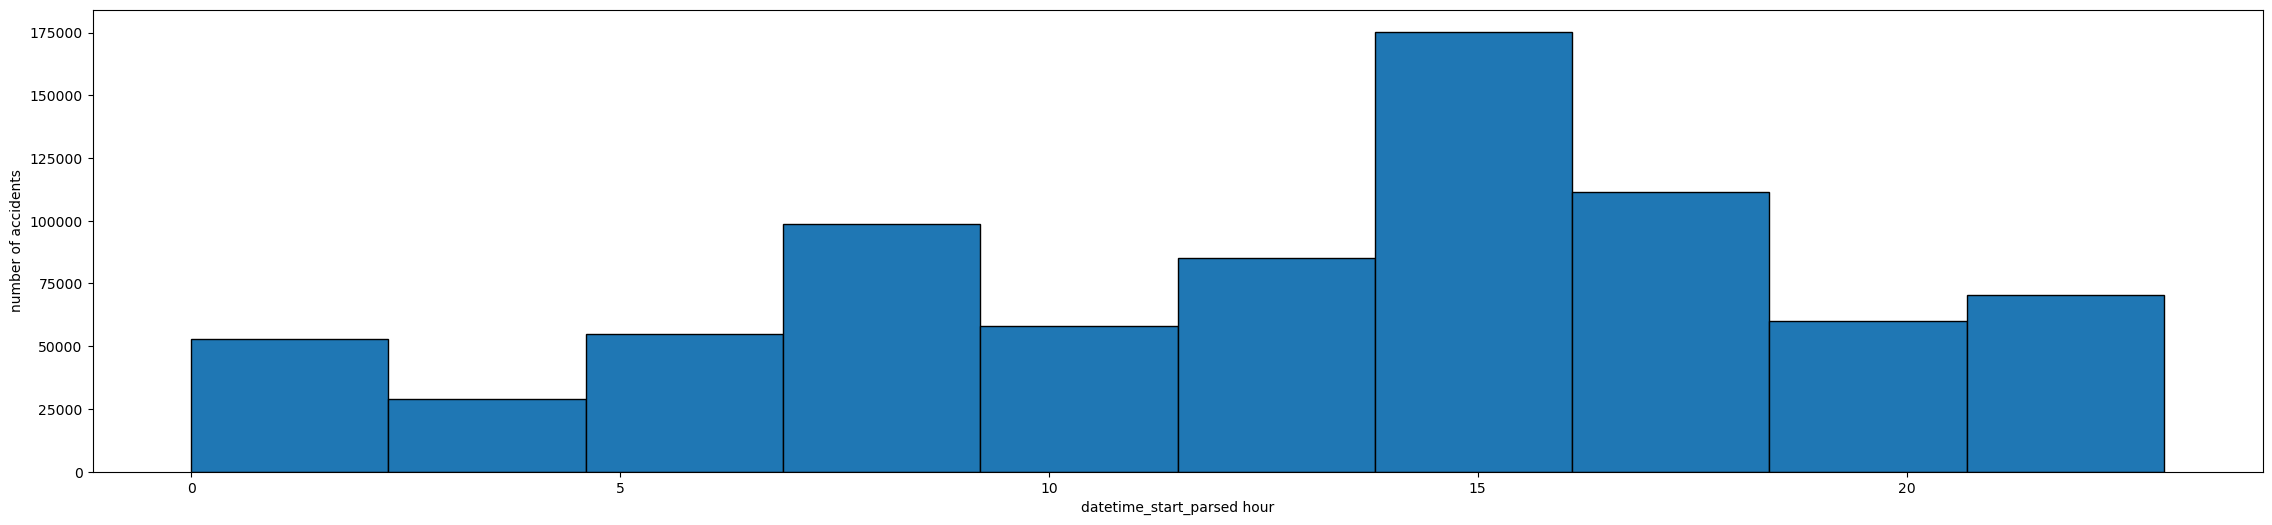

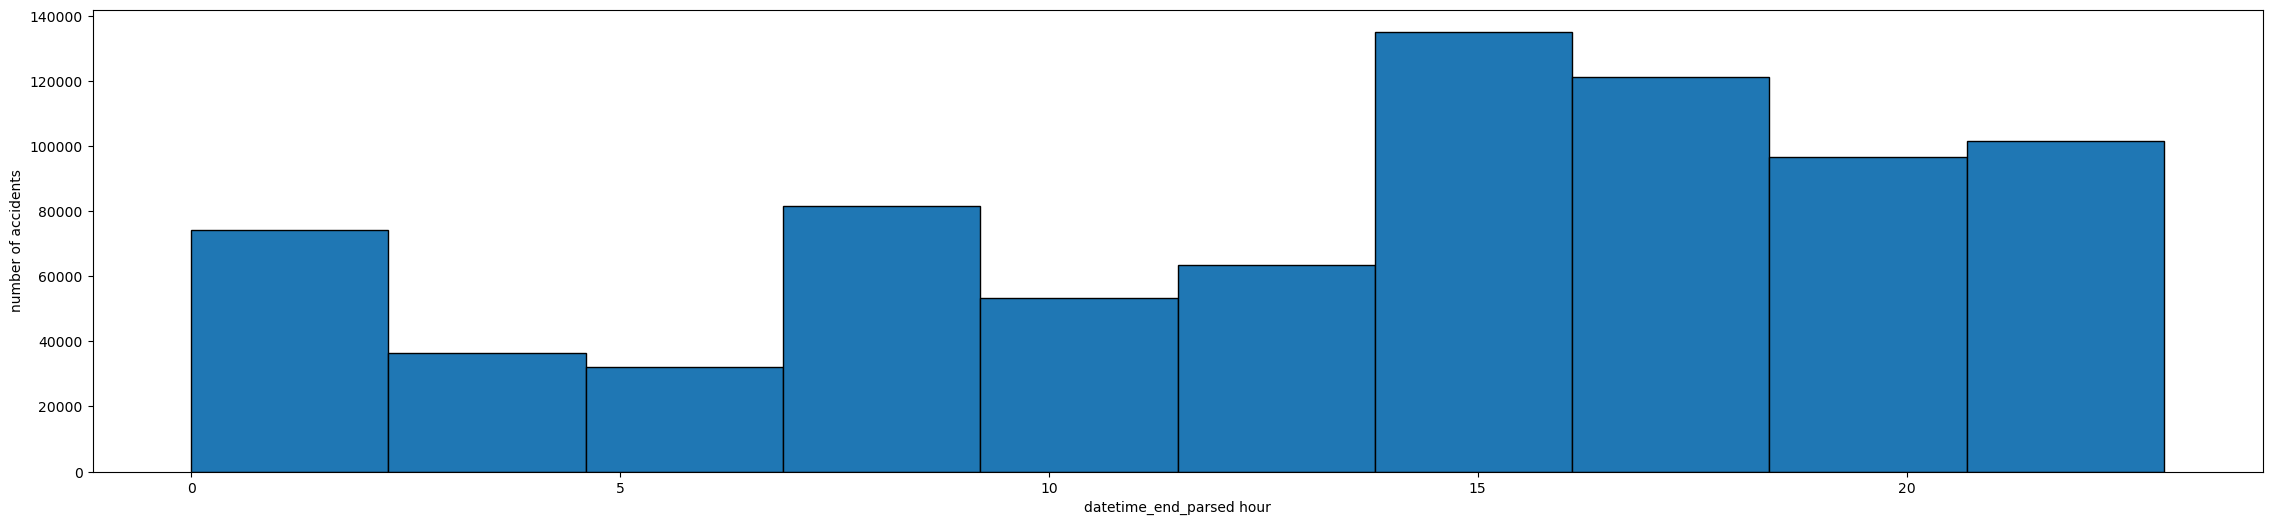

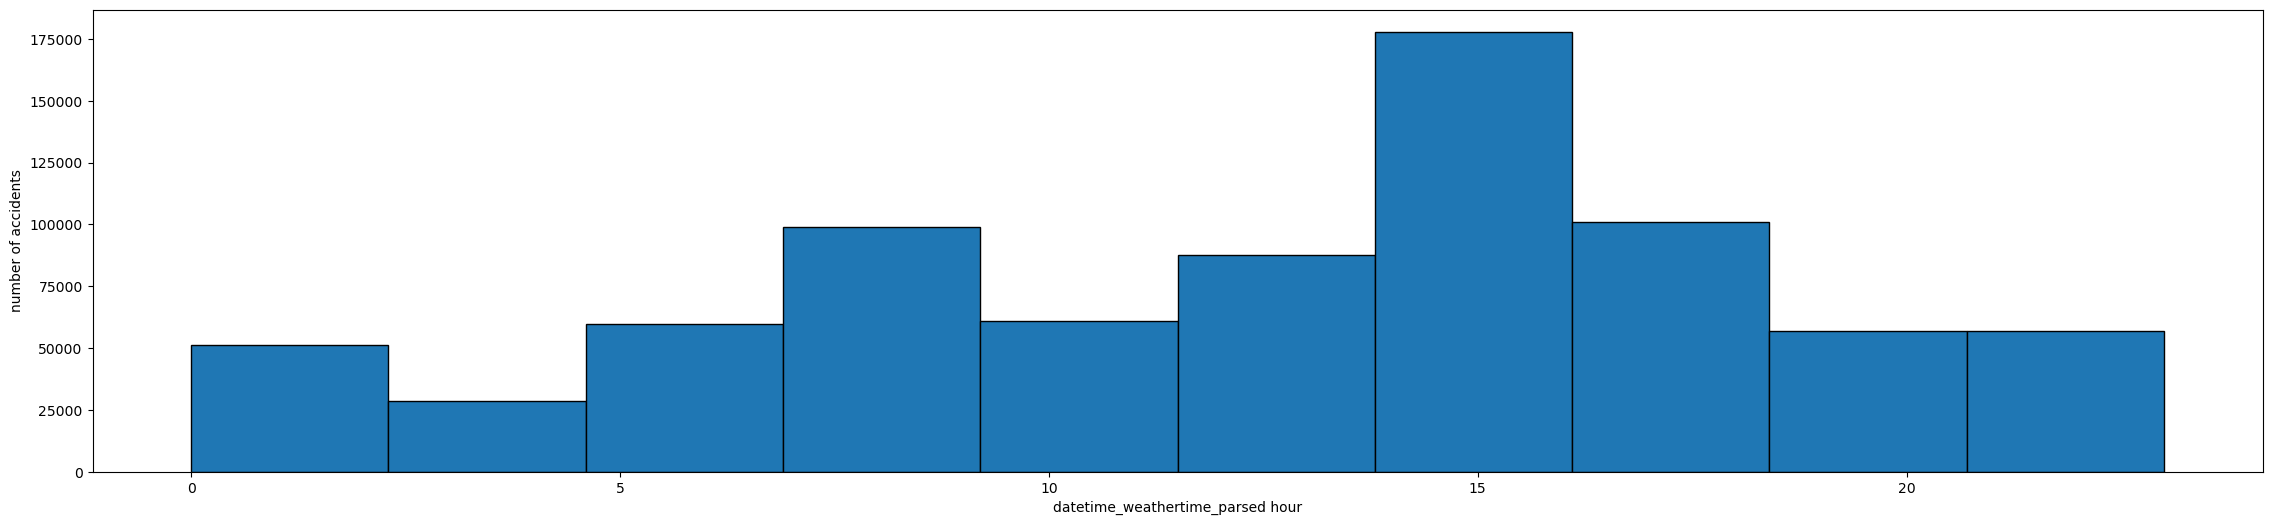

In [49]:
#histograms for hour datetime data
for i in Raw1[Datetime].columns:
    plt.figure(figsize=(28, 6))
    plt.hist(Raw1[Datetime][i].dt.hour, edgecolor='black')
    plt.xticks()
    plt.xlabel('{} hour'.format(i))
    plt.ylabel('number of accidents')
    plt.show()

In [53]:
#creating a dataframe for creating a correlation heatmap
numerical_heatmap = [
       'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'
]
accident_numerical_datetime = Raw1[numerical_heatmap]
accident_numeric = Raw1[numerical_heatmap]
#seperating dates and times into seperate columns
for col in ['datetime_start_parsed', 'datetime_end_parsed']:
    accident_numerical_datetime['{} day'.format(col)] = Raw1[col].dt.day
    accident_numerical_datetime['{} month'.format(col)] = Raw1[col].dt.month
    accident_numerical_datetime['{} year'.format(col)] = Raw1[col].dt.year
    accident_numerical_datetime['{} hour'.format(col)] = Raw1[col].dt.hour
    accident_numerical_datetime['{} minute'.format(col)] = Raw1[col].dt.minute
    accident_numerical_datetime['{} second'.format(col)] = Raw1[col].dt.second

C:\Users\tkx\AppData\Local\Temp\ipykernel_12368\2922903364.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tkx\AppData\Local\Temp\ipykernel_12368\2922903364.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tkx\AppData\Local\Temp\ipykernel_12368\2922903364.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

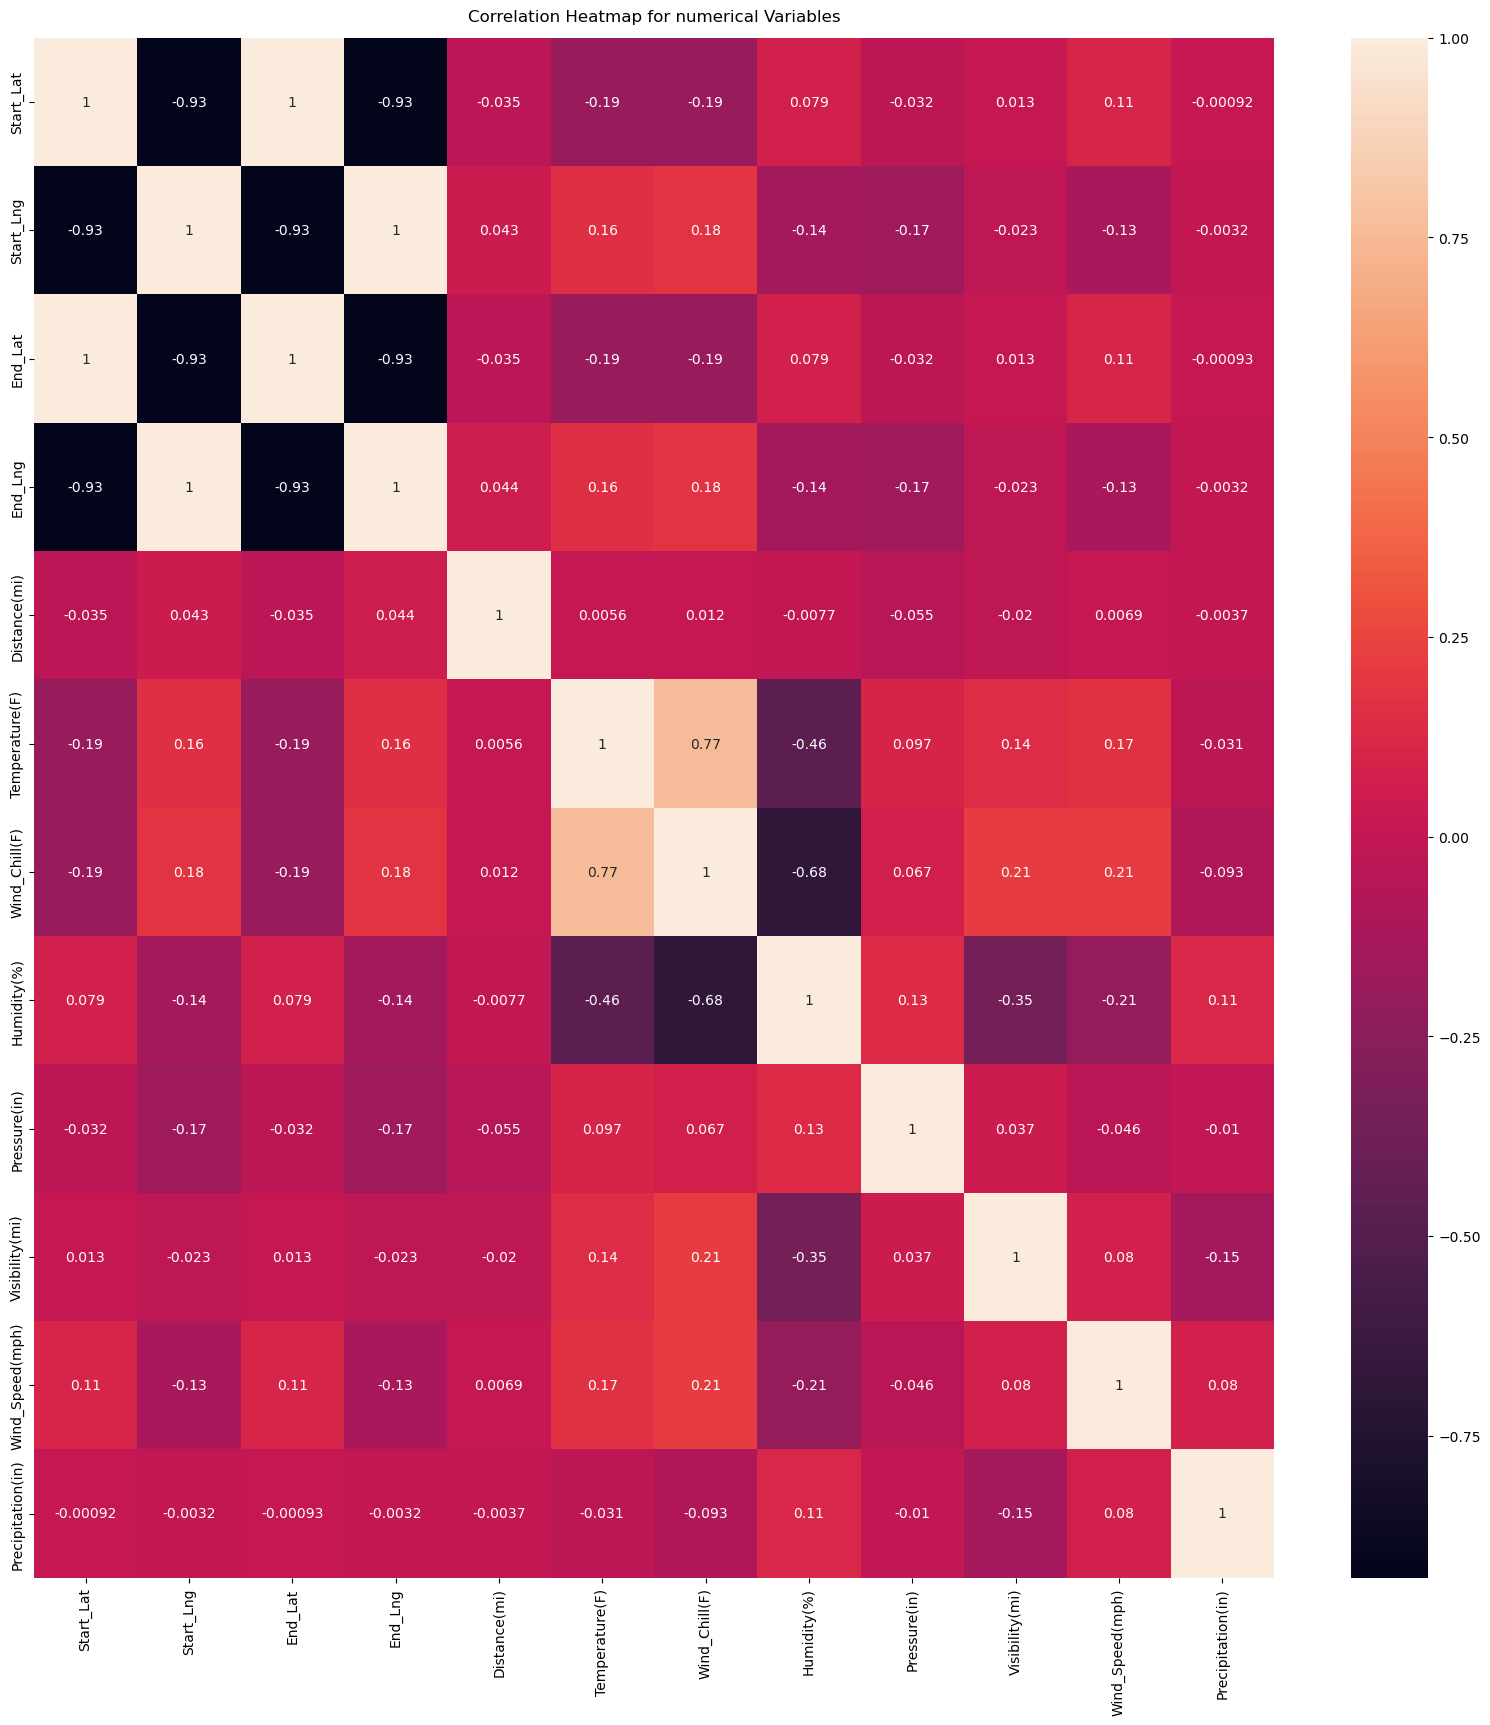

In [54]:
#heat map to find extreme positive and negative correlations
plt.figure(figsize=(20, 20))
sb.heatmap(accident_numeric.corr(), annot=True)
plt.title('Correlation Heatmap for numerical Variables', fontdict={'fontsize':12}, pad=12);

# Data Cleaning

In [23]:
Raw['datetime_start_parsed'] = pd.to_datetime(Raw['Start_Time'], format="%Y-%m-%d %H:%M:%S")
Raw['datetime_end_parsed'] = pd.to_datetime(Raw['End_Time'], format="%Y-%m-%d %H:%M:%S")
Raw['datetime_weathertime_parsed'] = pd.to_datetime(Raw['Weather_Timestamp'], format="%Y-%m-%d %H:%M:%S")

In [14]:
# Focus on state with most accidents, which is California
cali=Raw[Raw['State']=='CA']
cali=cali[['ID', 'Start_Time','City','Weather_Condition','Temperature(F)','datetime_start_parsed']]
cali.head()

ID          Start_Time         City Weather_Condition  Temperature(F)  \
988  A-989 2016-03-22 18:53:11    Echo Lake             Clear            28.9   
989  A-990 2016-03-22 19:00:49     San Jose  Scattered Clouds            57.2   
990  A-991 2016-03-22 20:07:32     Berkeley     Partly Cloudy            57.0   
991  A-992 2016-03-22 21:40:18     Berkeley             Clear            55.0   
992  A-993 2016-03-22 21:36:42  Sloughhouse             Clear            55.4   

    datetime_start_parsed  
988   2016-03-22 18:53:11  
989   2016-03-22 19:00:49  
990   2016-03-22 20:07:32  
991   2016-03-22 21:40:18  
992   2016-03-22 21:36:42

In [15]:
#date time cleaning and separation
cali["Year"] = cali["datetime_start_parsed"].dt.year
cali["Month"] = cali["datetime_start_parsed"].dt.month
cali["Day"] = cali["datetime_start_parsed"].dt.day
cali["Hour"] = cali["datetime_start_parsed"].dt.hour
cali.head()

ID          Start_Time         City Weather_Condition  Temperature(F)  \
988  A-989 2016-03-22 18:53:11    Echo Lake             Clear            28.9   
989  A-990 2016-03-22 19:00:49     San Jose  Scattered Clouds            57.2   
990  A-991 2016-03-22 20:07:32     Berkeley     Partly Cloudy            57.0   
991  A-992 2016-03-22 21:40:18     Berkeley             Clear            55.0   
992  A-993 2016-03-22 21:36:42  Sloughhouse             Clear            55.4   

    datetime_start_parsed  Year  Month  Day  Hour  
988   2016-03-22 18:53:11  2016      3   22    18  
989   2016-03-22 19:00:49  2016      3   22    19  
990   2016-03-22 20:07:32  2016      3   22    20  
991   2016-03-22 21:40:18  2016      3   22    21  
992   2016-03-22 21:36:42  2016      3   22    21

In [16]:
# Count number of accidents for every hour
# Percent to check for imbalanced classes
# Ratio of lowest to highest number for classes of hours is 1.77/7.91 which is not too bad
series = cali.ID.groupby(cali['datetime_start_parsed'].dt.hour).size()
hourDF = pd.DataFrame({'hour': series.index, 'count': series.values})
hourDF['percent'] = (hourDF['count'] / hourDF['count'].sum()) * 100
hourDF

hour  count   percent
0      0  18774  2.358934
1      1  17738  2.228762
2      2  16283  2.045942
3      3  14123  1.774541
4      4  14977  1.881845
5      5  23761  2.985545
6      6  31032  3.899139
7      7  36067  4.531782
8      8  33950  4.265783
9      9  28537  3.585645
10    10  28236  3.547825
11    11  29929  3.760548
12    12  39911  5.014776
13    13  45348  5.697930
14    14  54185  6.808290
15    15  61980  7.787724
16    16  59207  7.439299
17    17  62983  7.913750
18    18  48444  6.086939
19    19  33656  4.228842
20    20  26458  3.324421
21    21  25816  3.243754
22    22  23517  2.954887
23    23  20956  2.633100

In [17]:
#remove null entries instead of replacing with mean/mode/median as it will cause more imbalanced class
#Number of null entries less than 3% of data
cDF= cali.dropna(subset=['Weather_Condition','Temperature(F)','City'])
cDF = cDF.round()
cDF.head()

ID          Start_Time         City Weather_Condition  Temperature(F)  \
988  A-989 2016-03-22 18:53:11    Echo Lake             Clear            29.0   
989  A-990 2016-03-22 19:00:49     San Jose  Scattered Clouds            57.0   
990  A-991 2016-03-22 20:07:32     Berkeley     Partly Cloudy            57.0   
991  A-992 2016-03-22 21:40:18     Berkeley             Clear            55.0   
992  A-993 2016-03-22 21:36:42  Sloughhouse             Clear            55.0   

    datetime_start_parsed  Year  Month  Day  Hour  
988   2016-03-22 18:53:11  2016      3   22    18  
989   2016-03-22 19:00:49  2016      3   22    19  
990   2016-03-22 20:07:32  2016      3   22    20  
991   2016-03-22 21:40:18  2016      3   22    21  
992   2016-03-22 21:36:42  2016      3   22    21

In [18]:
#label encoding for city and weather condition
cDF["Weather_Condition"] = cDF["Weather_Condition"].astype('category')
cDF["City"] = cDF["City"].astype('category')
cDF["Weather"] = cDF["Weather_Condition"].cat.codes
cDF["City"] = cDF["City"].cat.codes
cDF.head()

ID          Start_Time  City Weather_Condition  Temperature(F)  \
988  A-989 2016-03-22 18:53:11   291             Clear            29.0   
989  A-990 2016-03-22 19:00:49   889  Scattered Clouds            57.0   
990  A-991 2016-03-22 20:07:32    76     Partly Cloudy            57.0   
991  A-992 2016-03-22 21:40:18    76             Clear            55.0   
992  A-993 2016-03-22 21:36:42   951             Clear            55.0   

    datetime_start_parsed  Year  Month  Day  Hour  Weather  
988   2016-03-22 18:53:11  2016      3   22    18        3  
989   2016-03-22 19:00:49  2016      3   22    19       53  
990   2016-03-22 20:07:32  2016      3   22    20       45  
991   2016-03-22 21:40:18  2016      3   22    21        3  
992   2016-03-22 21:36:42  2016      3   22    21        3

In [19]:
#remove unnecessary columns
cDF = cDF.drop(['Weather_Condition', 'Start_Time', 'datetime_start_parsed'], axis=1)
cDF.head()

ID  City  Temperature(F)  Year  Month  Day  Hour  Weather
988  A-989   291            29.0  2016      3   22    18        3
989  A-990   889            57.0  2016      3   22    19       53
990  A-991    76            57.0  2016      3   22    20       45
991  A-992    76            55.0  2016      3   22    21        3
992  A-993   951            55.0  2016      3   22    21        3

# Model 1 - Decision Tree

In [11]:
# Define the features and target variable
features = ['City',  'Temperature(F)', 'Weather', 'Year', 'Month', 'Day']
target = 'Hour'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cDF[features], cDF[target], test_size=0.2)

In [35]:
# Define the decision tree model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the hour of each accident in the testing data
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

Training Accuracy 	: 0.9031965735481026
Test Accuracy 	: 0.4458991518169792


<AxesSubplot:>

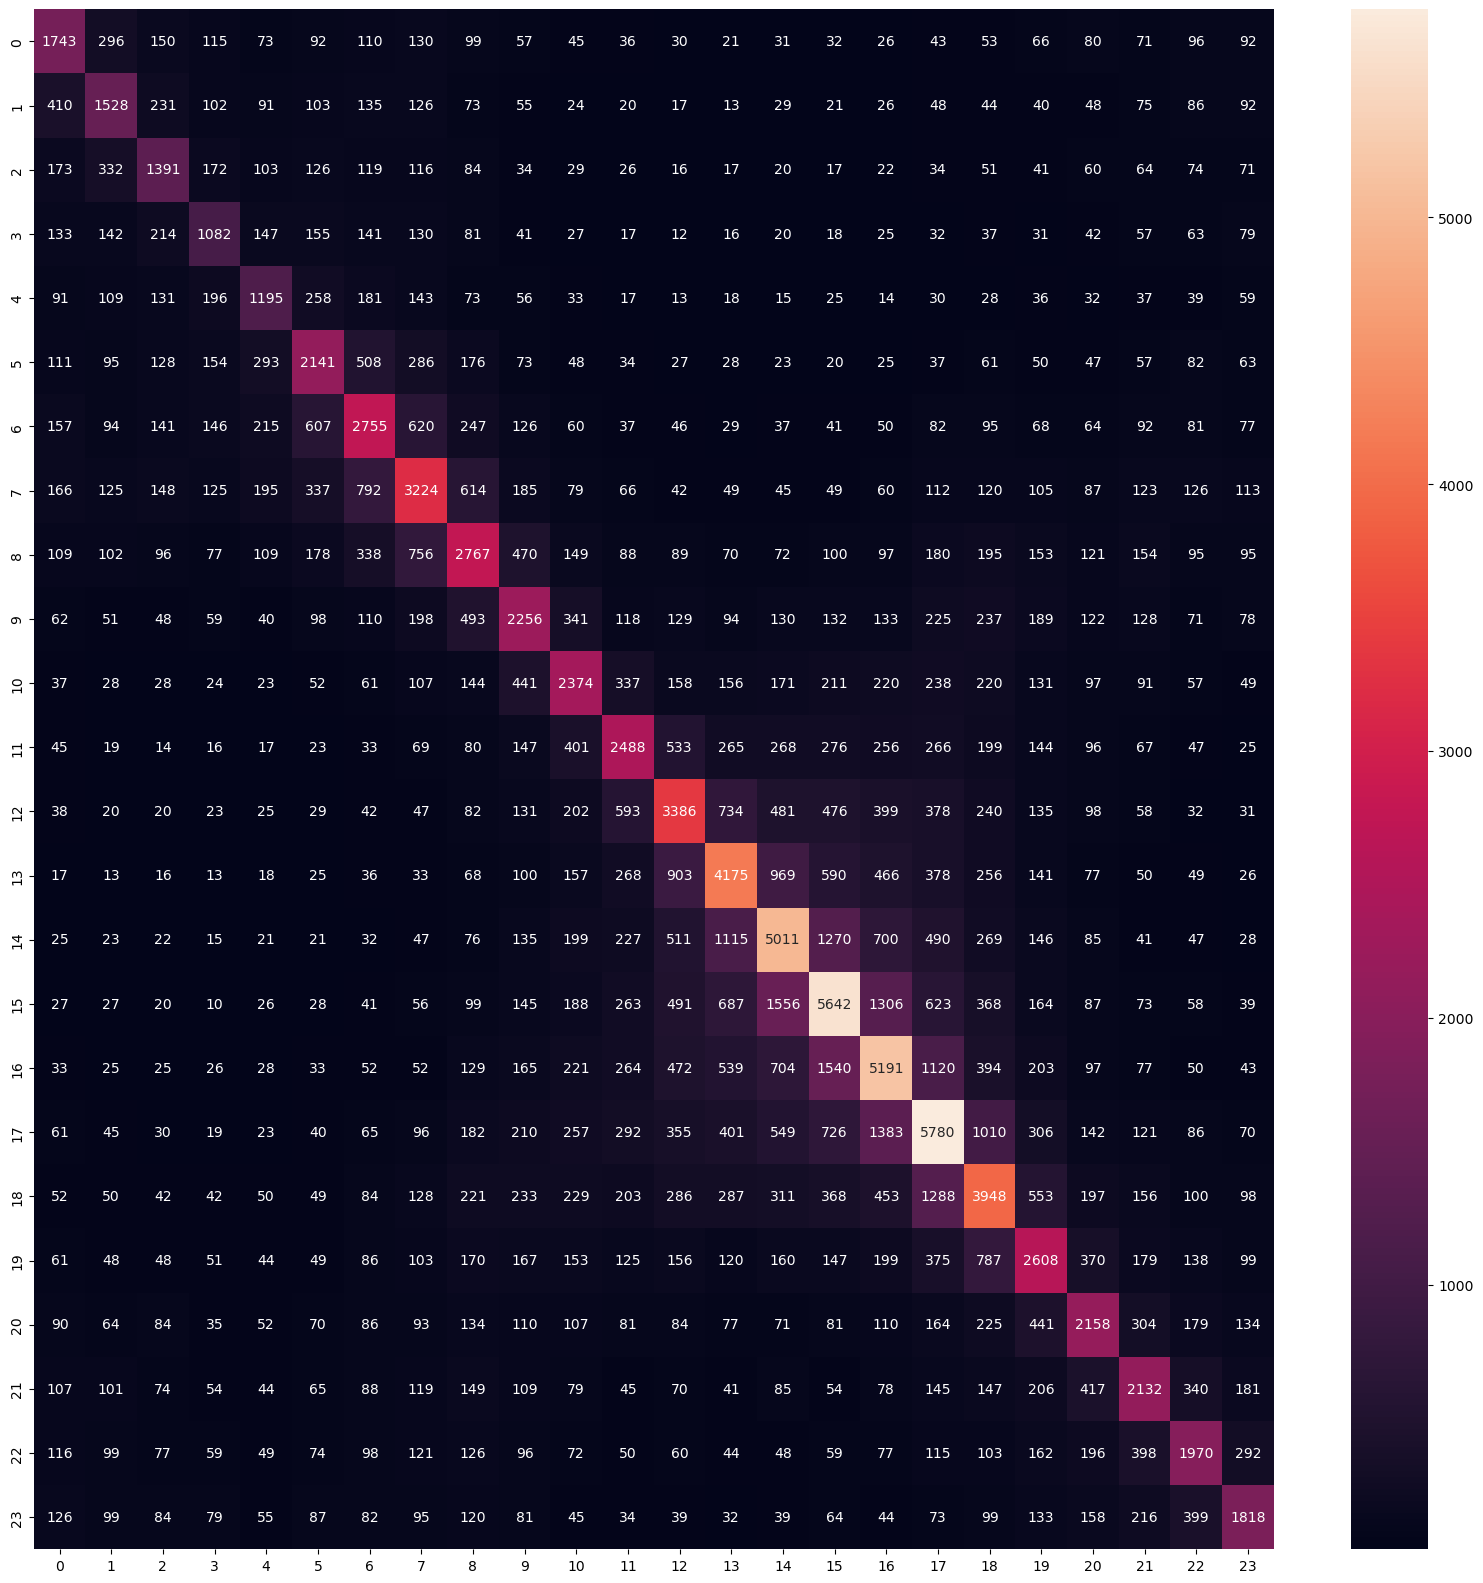

In [36]:
# Print the Classification Accuracy
print("Training Accuracy \t:", model.score(X_train, y_train))
print("Test Accuracy \t:", model.score(X_test, y_test))

# Plot the two-way Confusion Matrix
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10})

# Model 2 - Random Forest

In [14]:
# Define the features and target variable
features = ['City',  'Temperature(F)', 'Weather', 'Year', 'Month', 'Day']
target = 'Hour'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cDF[features], cDF[target], test_size=0.2)

In [15]:
# Define the decision tree model
model = RandomForestClassifier(n_estimators = 100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the hour of each accident in the testing data
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# print("Training Accuracy \t:", model.score(X_train, y_train))
# print("Test Accuracy \t:", model.score(X_test, y_test))

Training Accuracy 	: 0.9029647498249164
Test Accuracy 	: 0.4562939330272612


<AxesSubplot:>

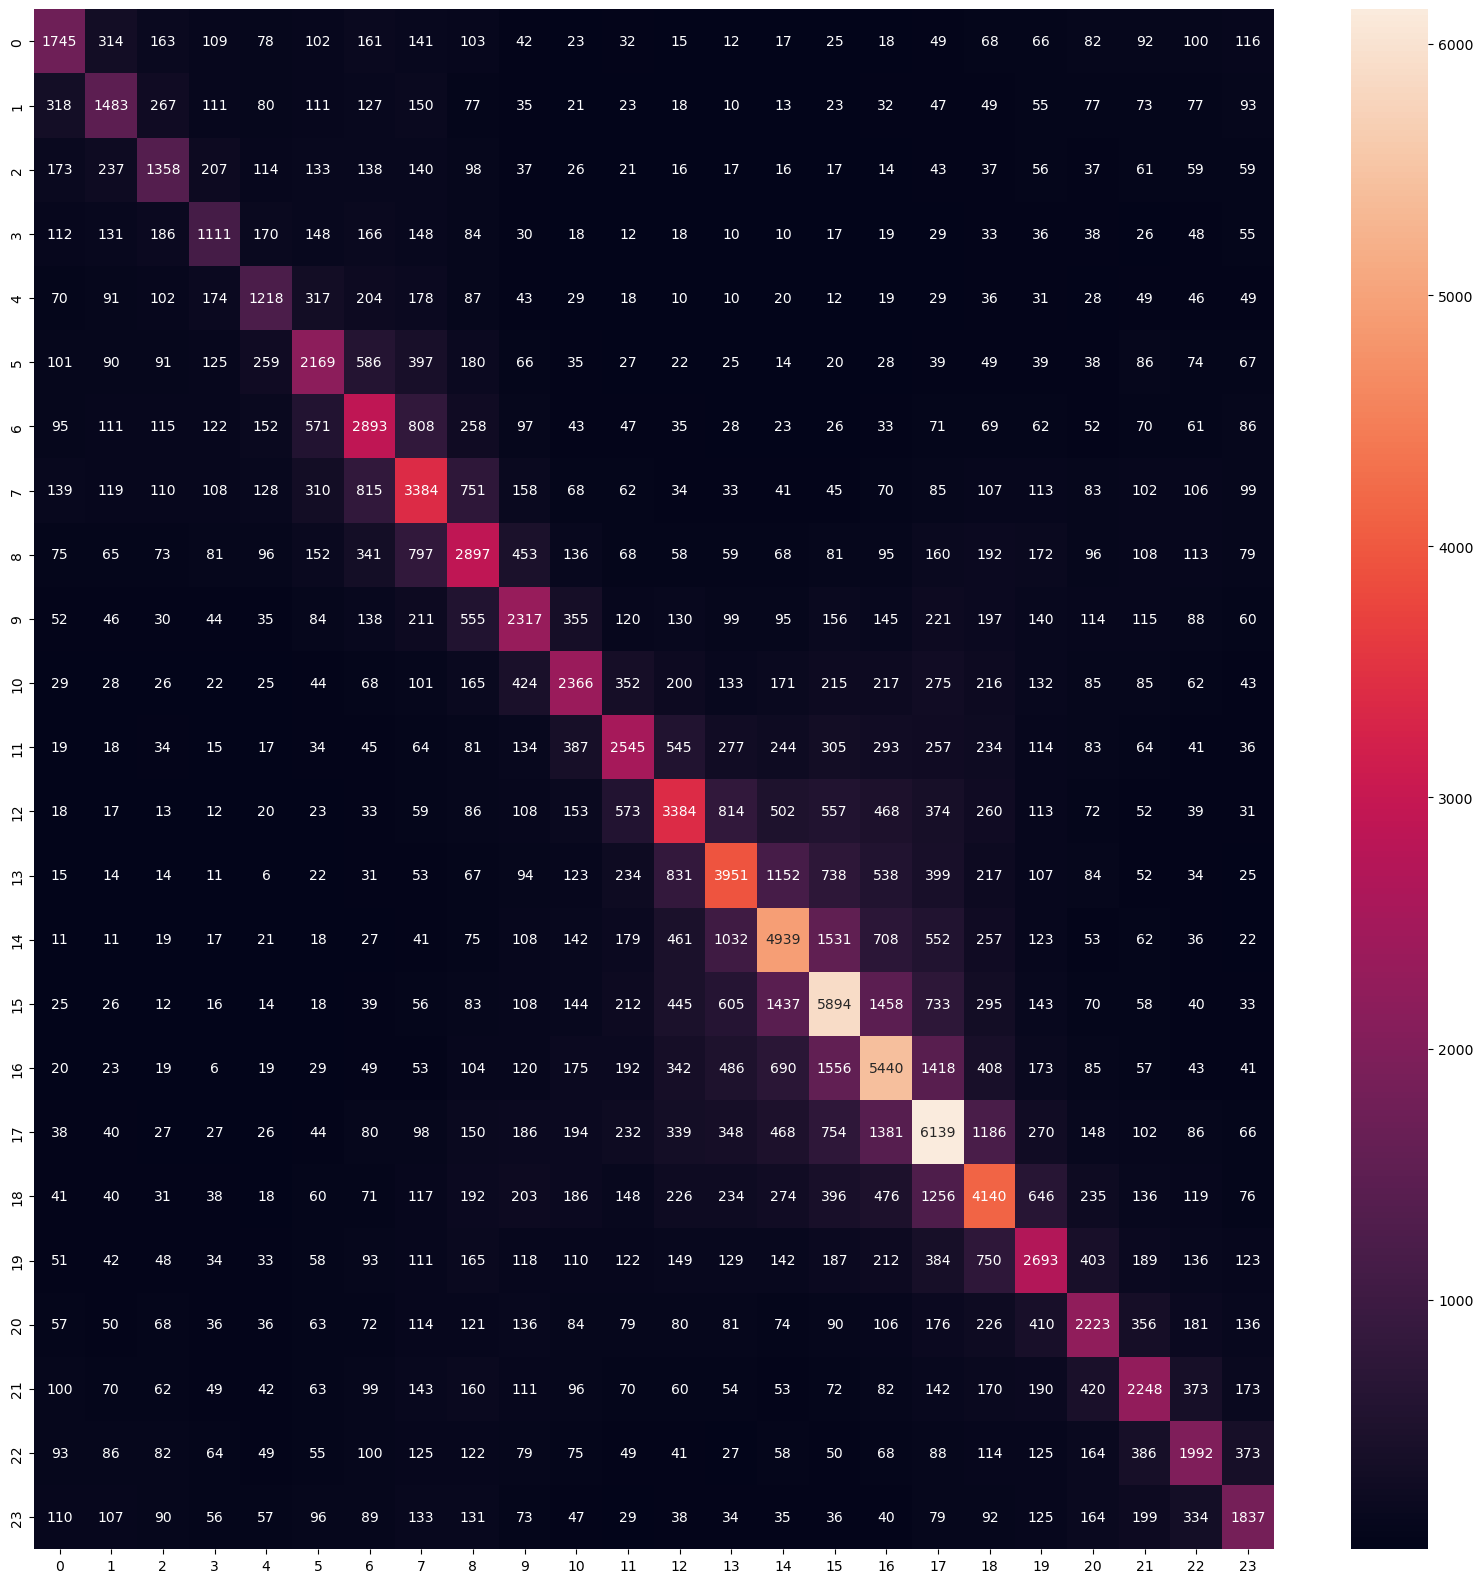

In [16]:
# Print the Classification Accuracy
print("Training Accuracy \t:", model.score(X_train, y_train))
print("Test Accuracy \t:", model.score(X_test, y_test))

# Plot the two-way Confusion Matrix
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10})

# Model 3- xgboost

In [17]:
# Define the features and target variable
features = ['City',  'Temperature(F)', 'Weather', 'Year', 'Month', 'Day']
target = 'Hour'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cDF[features], cDF[target], test_size=0.2)

In [18]:
# Define the decision tree model
model = xgb.XGBClassifier(learning_rate=0.01, max_depth=5,
       min_child_weight=1, n_estimators=100, subsample=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the hour of each accident in the testing data
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Training Accuracy \t:", model.score(X_train, y_train))
print("Test Accuracy \t:", model.score(X_test, y_test))

Training Accuracy 	: 0.1286881046870542
Test Accuracy 	: 0.12491894275413068


Training Accuracy 	: 0.1286881046870542
Test Accuracy 	: 0.12491894275413068


<AxesSubplot:>

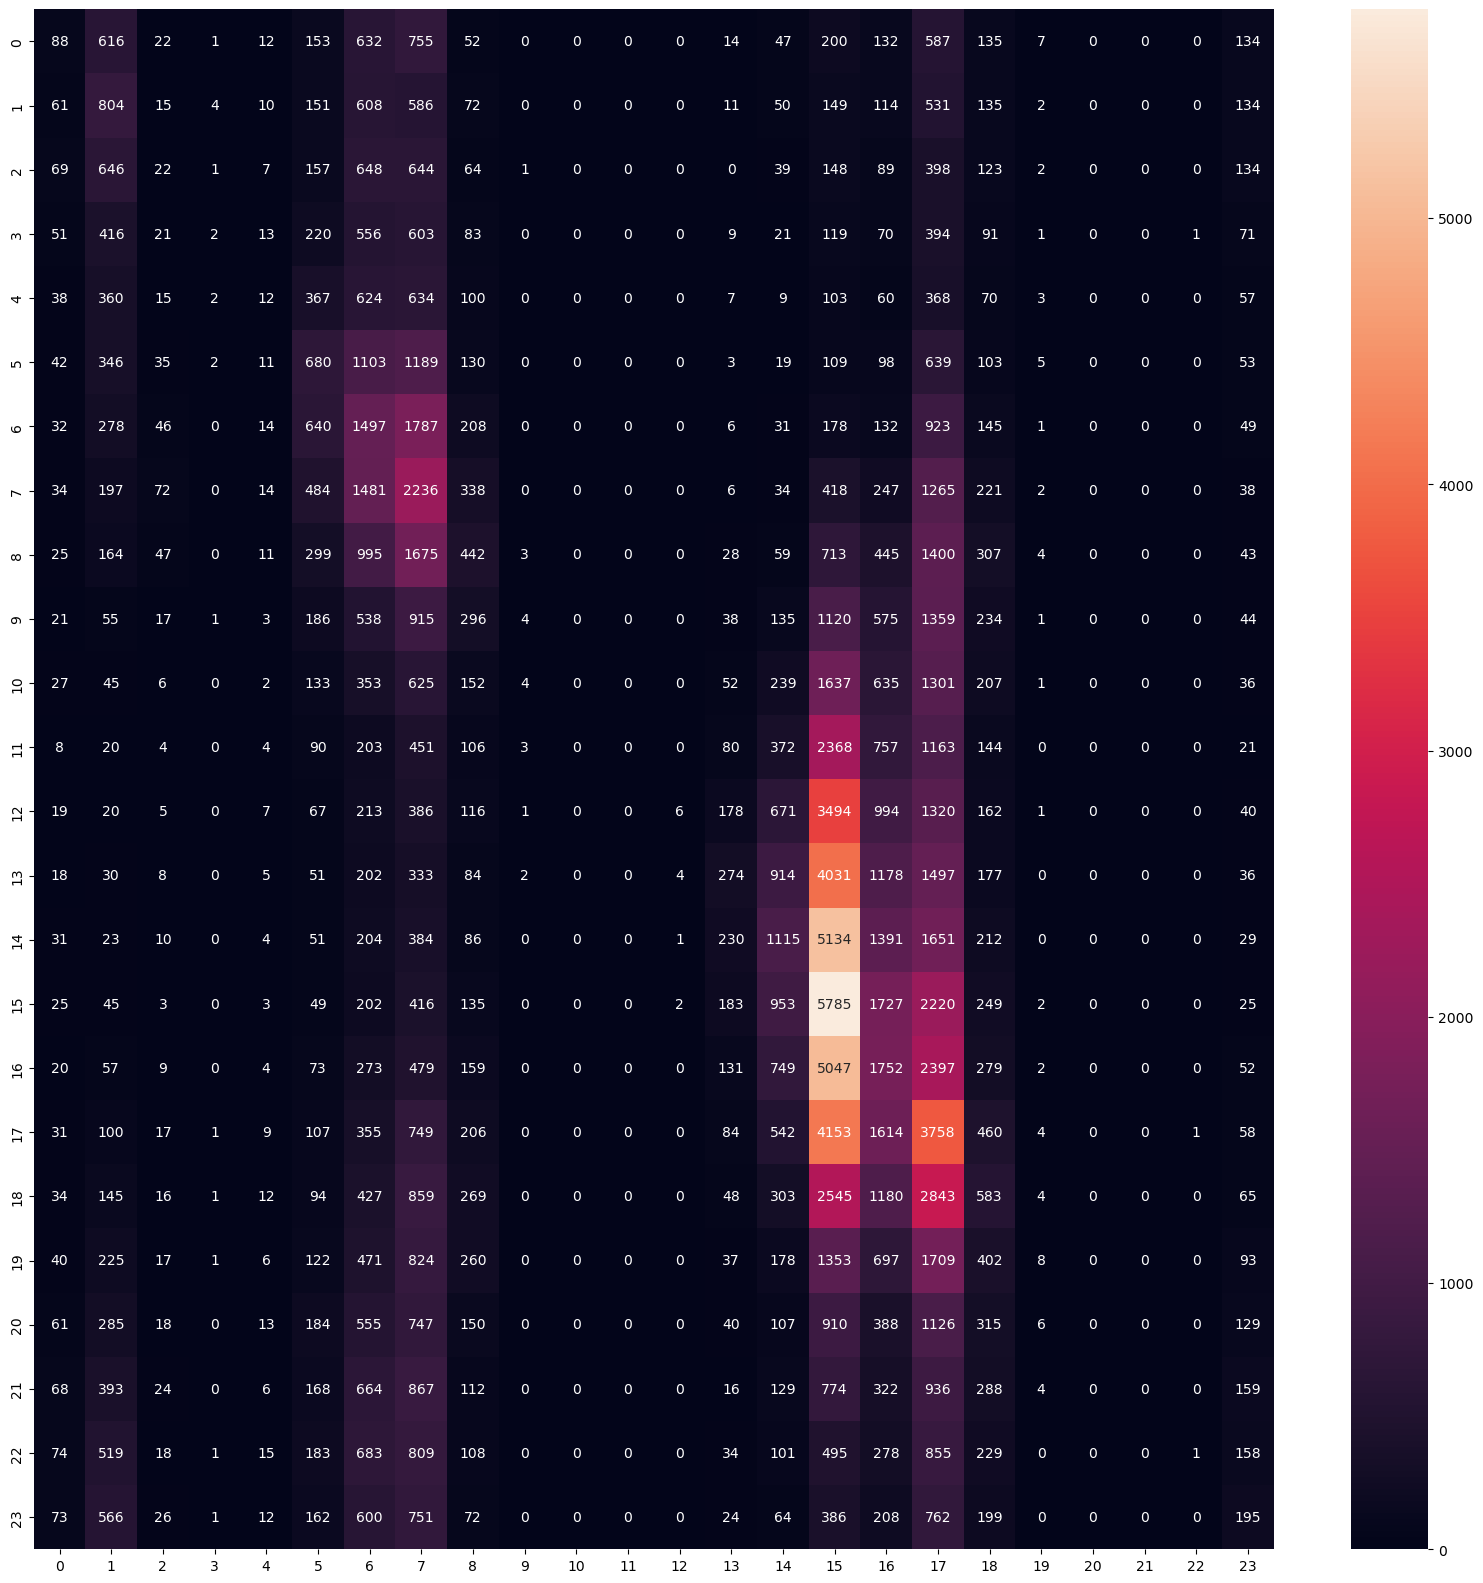

In [19]:
# Print the Classification Accuracy
print("Training Accuracy \t:", model.score(X_train, y_train))
print("Test Accuracy \t:", model.score(X_test, y_test))

# Plot the two-way Confusion Matrix
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10})